# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Открываем файл с данными и изучаем общую информацию.

In [4]:
import pandas as pd
data = pd.read_csv( '/datasets/real_estate_data.csv', sep= "\t" ) #берем файл
print (data.info())
data.head(10) #ознакамливаемся с содержимым

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

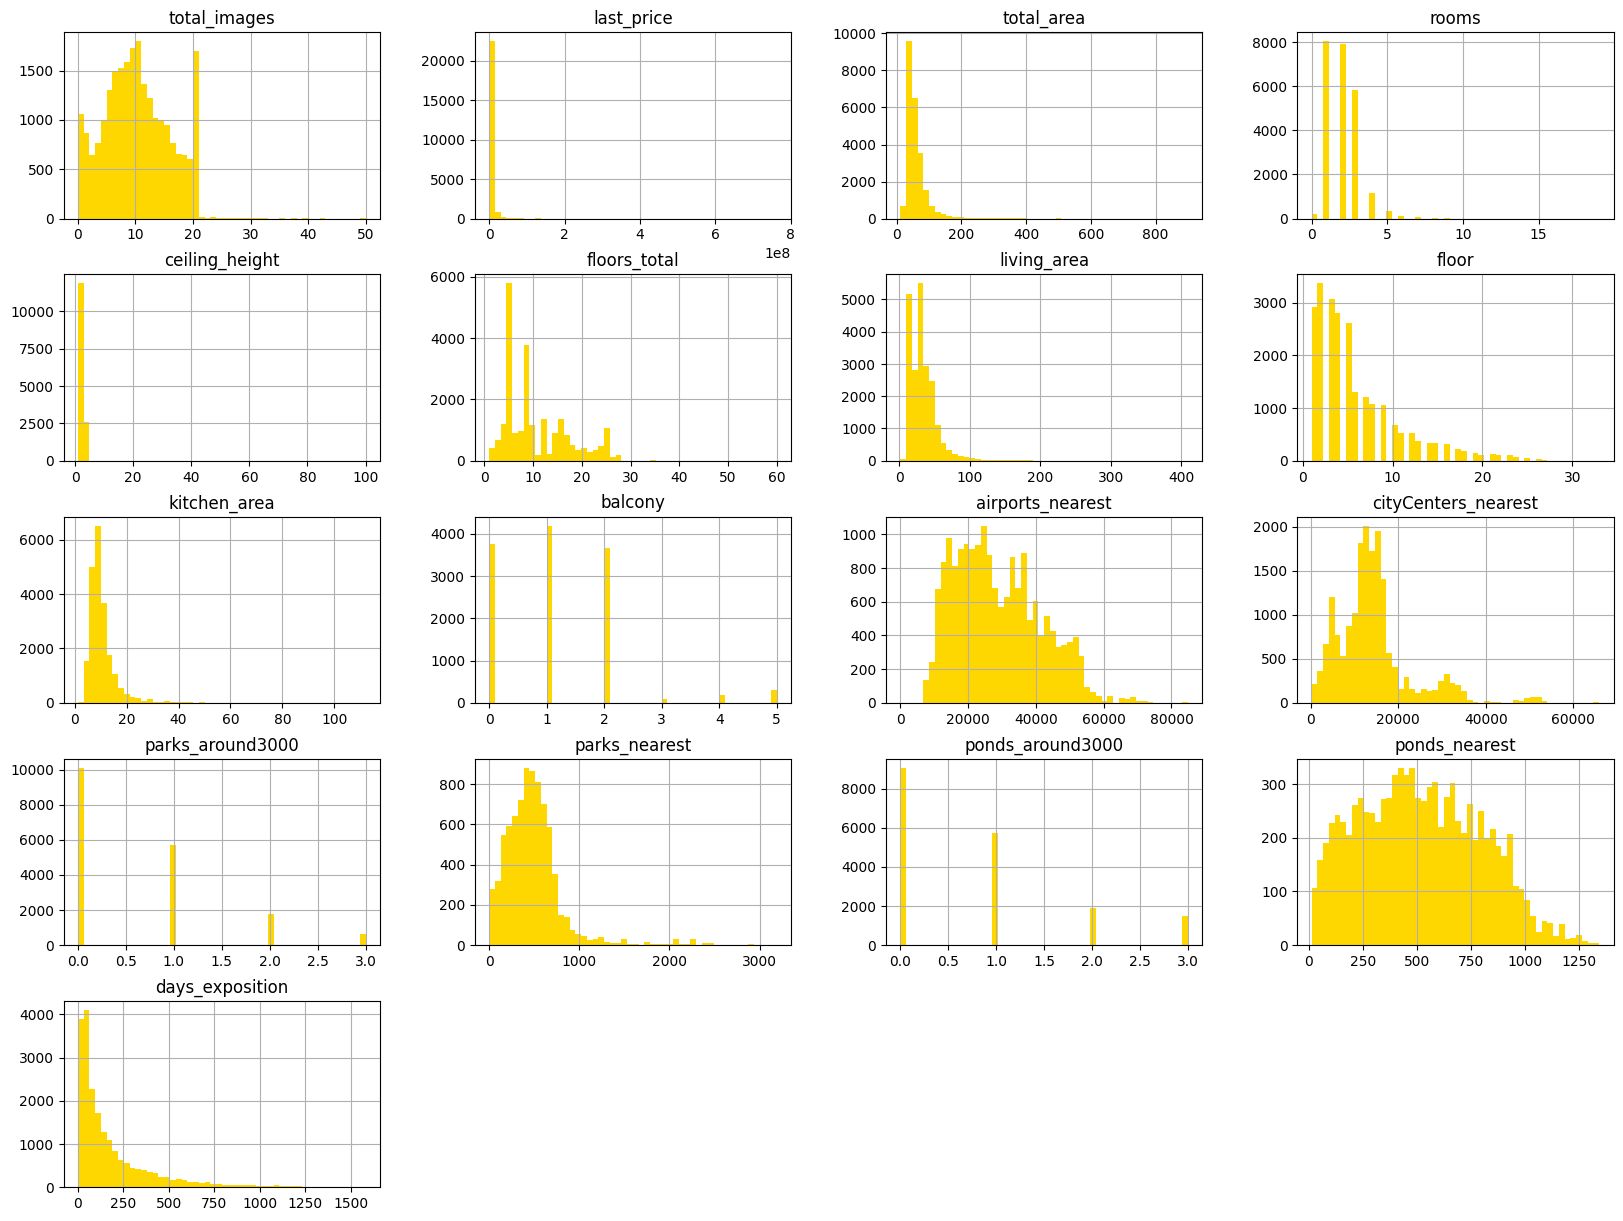

In [5]:
data.hist(bins=50, figsize=(20, 15), color='gold')

<div class="alert alert-info">
    
При первоначальном построении гистограмм все смотрелось не так уж и плохо, но при увеличении детализации bins повылазили зубья пилы. Это может вызываться как пропусками, так и аномалиями в данных. А может рынок недвижимости такую картину всегда показывает? Начнем же разбираться.
    
Проверим дубликаты.

In [6]:
data[data.duplicated()].count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

<div class="alert alert-info">
    
Строк-дубликатов нет.

### Задание.Предобработка данных
#### 1.Найдите и изучите пропущенные значения в столбцах:
* Определите, в каких столбцах есть пропуски.
* Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
* В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

####2.Рассмотрите типы данных в каждом столбце:
* Найдите столбцы, в которых нужно изменить тип данных.
* Преобразуйте тип данных в выбранных столбцах.
* В ячейке с типом markdown поясните, почему нужно изменить тип данных.
* Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.
* Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.

* Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
* В противном случае удалите редкие и выбивающиеся значения.
* В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.

In [7]:
data.isna().sum() #проверяем, в каких столбцах есть пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбцах:
- высота потолков; можно заполнить медианными значениями
- количество этажей; 86 пропусков. Можно заполнить медианными значениями
- жилая площадь в м2; ?
- апартаменты; маловероятно, что это апартаменты. Заполним значением "0"
- площадь кухни; возможно, просто пропущено. Можно заполнить медианным значением
- балконы; Строки с пропусками, вероятно обозначают
- название населенного пункта;
- расстояние до ближайшего аэропорта в метрах (м);
- расстояние до центра города (м);
- число парков в радиусе 3 км;
- расстояние до ближайшего парка (м);
- число водоёмов в радиусе 3 км;
- расстояние до ближайшего водоёма (м)
- сколько дней было размещено объявление (от публикации до снятия);

In [8]:
#заполним пропущенные значения высоты потолков медианными значениями(по всем значениями)
data = data
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#проверяем, в каких столбцах есть пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Узнаем, что содержится в графе "is_apartment"

In [9]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

В России мало используются апартаменты, в основном - продаются оформленные в жилье квартиры. Данные пропуски вполне можно заменить на False

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
#data['is_apartment'] = data['is_apartment'].astype(bool, copy=False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Посмотрим на столбец 'balcony'. Наиболее вероятно, что не заполнены графы у тех квартир, где балконов нет. ЗАменим на "0"

In [11]:
data['balcony'] = data['balcony'].fillna(0.0)
data['balcony'] = data['balcony'].astype(int)
print (data['balcony'].value_counts())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64


In [12]:
print (data['parks_nearest'].value_counts().sort_values(ascending=False))
print ()
print (data['ponds_nearest'].value_counts().sort_values(ascending=False))

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
847.0      1
760.0      1
1167.0     1
4.0        1
2984.0     1
Name: parks_nearest, Length: 995, dtype: int64

427.0     70
454.0     41
153.0     40
433.0     39
474.0     37
          ..
999.0      1
188.0      1
321.0      1
808.0      1
1134.0     1
Name: ponds_nearest, Length: 1096, dtype: int64


В графах 'parks_nearest', 'ponds_nearest' пропуски из за того, что парков и прудов просто нет поблизости от жилья. Можно заполнить большим значением, чтобы не путаться, т.к. присутствуют графы 'parks_around3000' и 'ponds_around3000', то заполним цифрами более 3000. Например 5000.

In [13]:
data['parks_nearest'] = data['parks_nearest'].fillna(5000)
data['ponds_nearest'] = data['ponds_nearest'].fillna(5000)

'parks_around3000' и 'ponds_around3000' - вероятнее всего, также отсутствуют значения, потому что прудов и парков просто нет поблизости. Заменим пропуски на '0'

<Axes: >

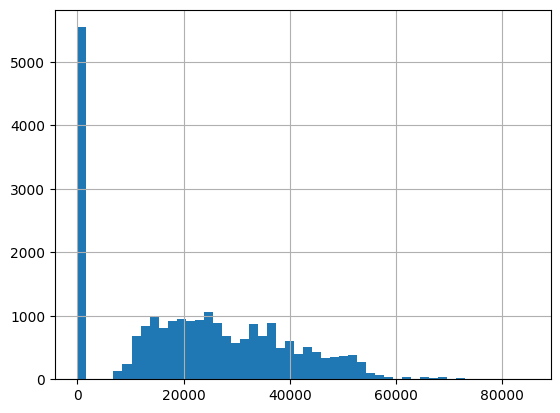

In [14]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['airports_nearest'].hist(bins=50)

Аналогично с аэропортами. Проставим значение '0'. Как видно на графике - данные значения в дальнейшем можно проклассифицировать как выбросы

В графе cityCenters_nearest заменим расстояния на медианные.

In [15]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
print(data.isna().sum())


total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64


Изучим графу days_exposition. Заполним медианным значением.

<Axes: >

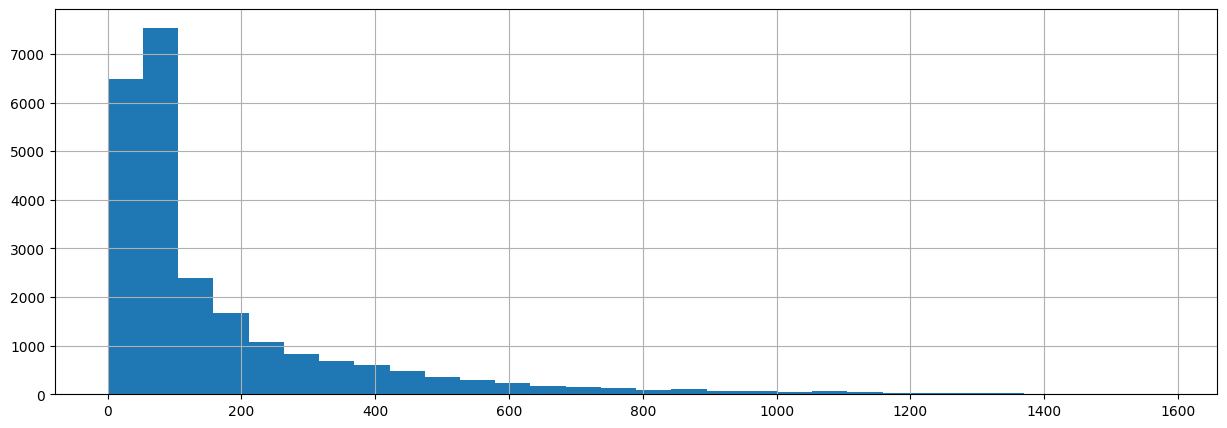

In [16]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'].hist(bins=30, range=(0, 1580), figsize=(15,5)) #посмотрим на гистограммму

Каких то явных выбросов нет.

Пропусков в floors_total всего 86. Незначительное число. Удалим их

In [17]:
data.dropna(subset=['floors_total'], inplace= True)

Столбцы Living_area и kitchen_area заполним медианными значениями в зависимости от количества комнат в помещении.

In [18]:
for room in data['rooms'].unique():
    med_liv_area = data.loc[data['rooms'] == room]['living_area'].median()
    med_kitc_area = data.loc[data['rooms'] == room]['kitchen_area'].median()
    data.loc[data['rooms'] == room, 'living_area'] = data.loc[data['rooms'] == room, 'living_area'].fillna(med_liv_area)
    data.loc[data['rooms'] == room, 'kitchen_area'] = data.loc[data['rooms'] == room, 'kitchen_area'].fillna(med_kitc_area)
print(data.isna().sum())

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height            0
floors_total              0
living_area               0
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area            194
balcony                   0
locality_name            48
airports_nearest          0
cityCenters_nearest       0
parks_around3000          0
parks_nearest             0
ponds_around3000          0
ponds_nearest             0
days_exposition           0
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Остались пропуски в kitchen_area. происходит из за того, что одна из медиан получилась со значением NaN. Значений всего 194. Удалим эти строки.

In [19]:
data.dropna(subset=['kitchen_area'], inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23419 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23419 non-null  int64  
 1   last_price            23419 non-null  float64
 2   total_area            23419 non-null  float64
 3   first_day_exposition  23419 non-null  object 
 4   rooms                 23419 non-null  int64  
 5   ceiling_height        23419 non-null  float64
 6   floors_total          23419 non-null  float64
 7   living_area           23419 non-null  float64
 8   floor                 23419 non-null  int64  
 9   is_apartment          23419 non-null  bool   
 10  studio                23419 non-null  bool   
 11  open_plan             23419 non-null  bool   
 12  kitchen_area          23419 non-null  float64
 13  balcony               23419 non-null  int64  
 14  locality_name         23371 non-null  object 
 15  airports_nearest   

Ура! Пропусков больше не осталось. Перейдем к следующему шагу.

Рассмотрите типы данных в каждом столбце:
* Найдите столбцы, в которых нужно изменить тип данных.
* Преобразуйте тип данных в выбранных столбцах.
* В ячейке с типом markdown поясните, почему нужно изменить тип данных.

first_day_exposition первым делом необходимо перевести в datetime. Специальный формат даты может понадобится для дальнейшего анализа.

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

parks_around3000, ponds_around3000, days_exposition для удобства преобразуем в целочисленные.

In [21]:
data["days_exposition"] = data["days_exposition"].astype(int)
data["parks_around3000"] = data["parks_around3000"].astype(int)
data["ponds_around3000"] = data["ponds_around3000"].astype(int)
data["floors_total"] = data["floors_total"].astype(int)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,5000.0,0,5000.0,81
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,9.50,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,0.0,0.0,0,5000.0,0,5000.0,55
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,5000.0,0,5000.0,155
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,5000.0,0,5000.0,95
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,0.0,0.0,0,5000.0,0,5000.0,189
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,5000.0,0,5000.0,289


3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [22]:
print (data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [23]:
data['locality_name'] = data['locality_name'].replace(['село ', 'городской поселок ', 'поселок '\
                                                       , 'посёлок ', 'коттеджный поселок ', 'деревня ', \
                                                       'поселок городского типа ', 'посёлок городского типа ',\
                                                       'садовое товарищество ', 'поселок станции ', 'городского типа ',\
                                                       'городского типа', 'городской ' ], '', regex=True)
data['locality_name'] = data['locality_name'].fillna('Unknown')
data['locality_name'].value_counts()

Санкт-Петербург    15542
Мурино               559
Кудрово              449
Шушары               435
Всеволожск           392
                   ...  
Алексеевка             1
Белоостров             1
Пельгора               1
Каложицы               1
Дзержинского           1
Name: locality_name, Length: 308, dtype: int64

4.Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.

Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
В противном случае удалите редкие и выбивающиеся значения.
В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.

Окинем взглядом данные в ячейках.

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >]],
      dtype=object)

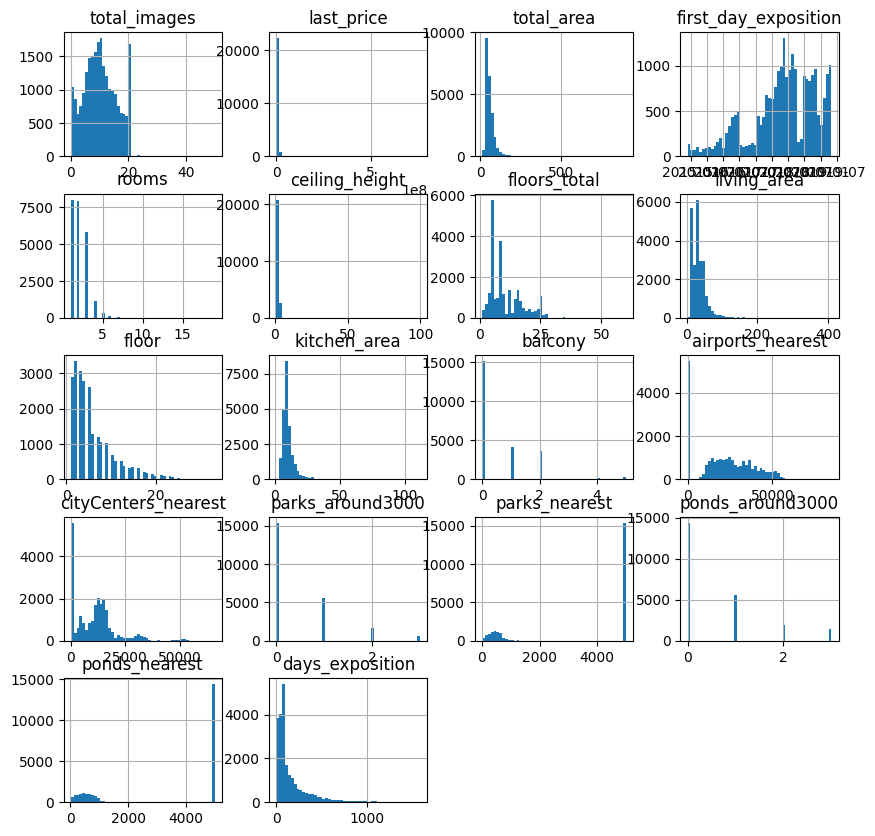

In [24]:
data.hist(bins=50, figsize=(10, 10))

<div class="alert alert-info">
Сейчас попробую

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >]],
      dtype=object)

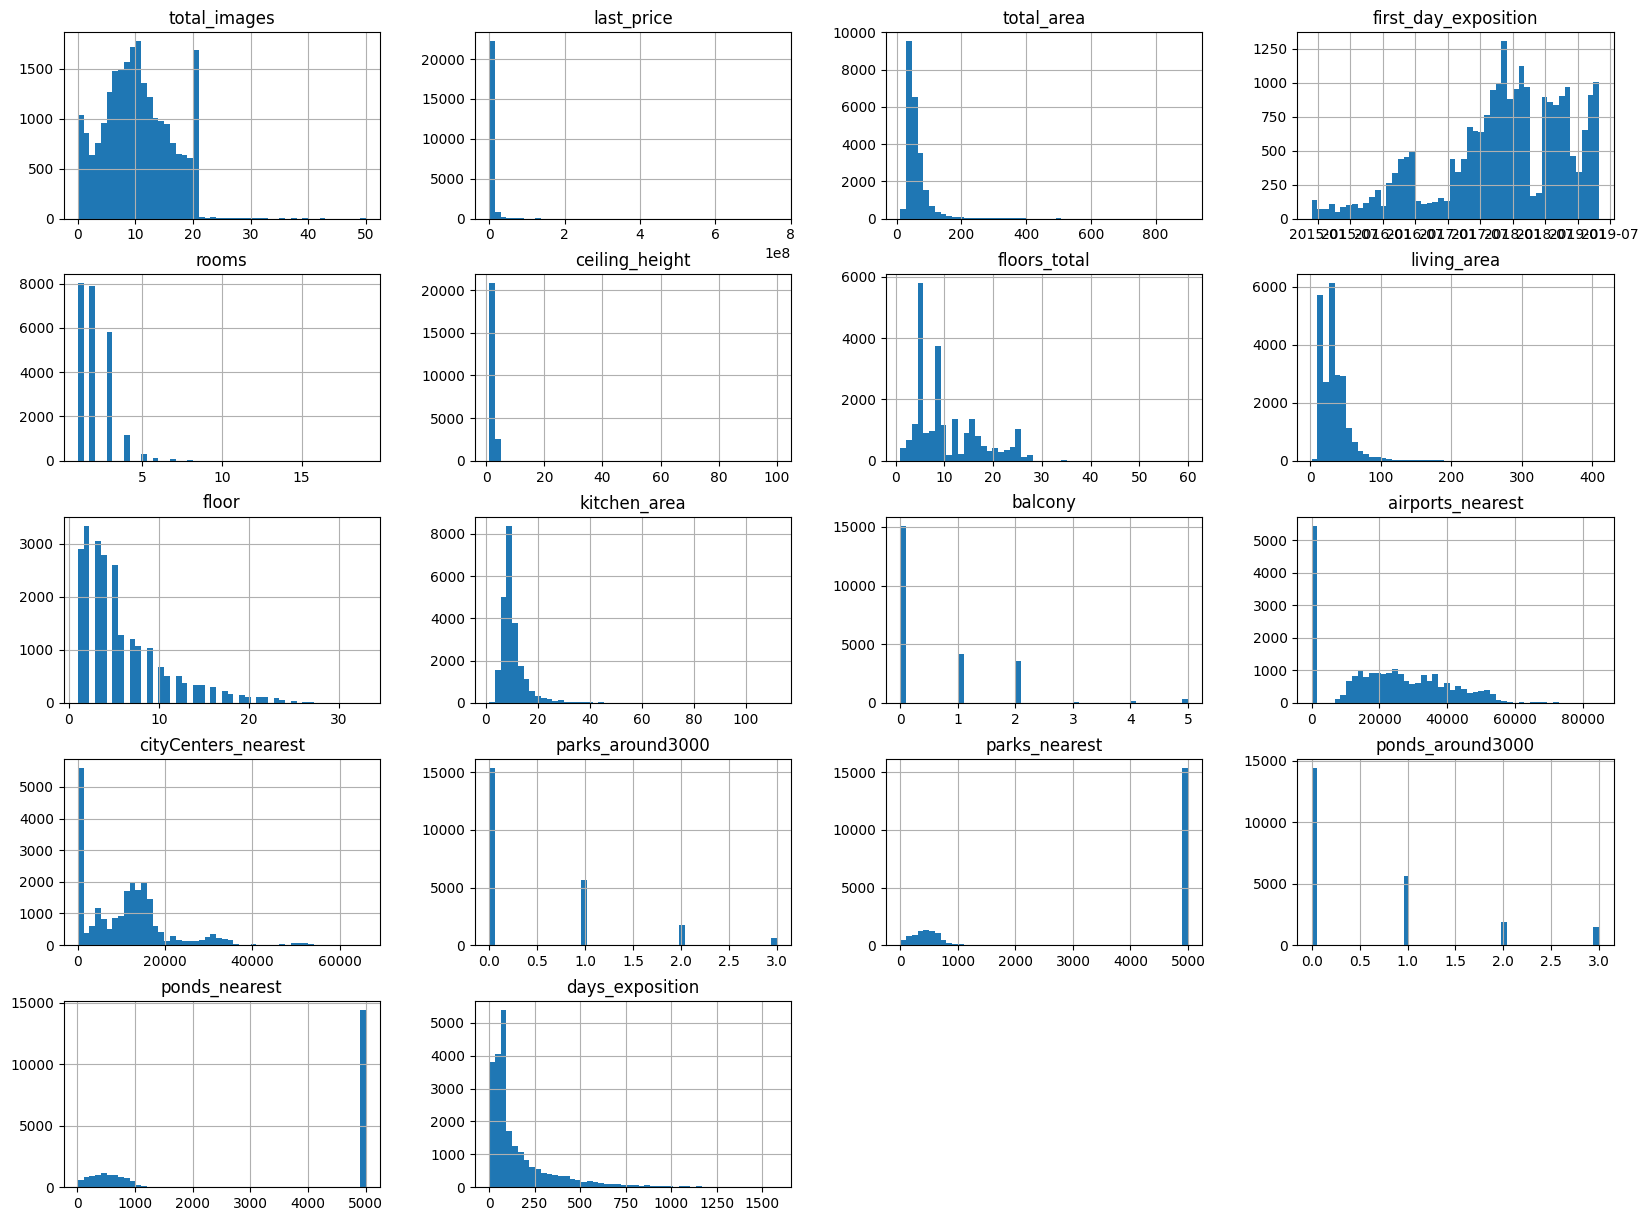

In [25]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))

<div class="alert alert-info">
Так и правда лучше. Спасибо!

пики на диаграмме 'rooms' объясняются площадями, типичными для количества комнат. Проверим

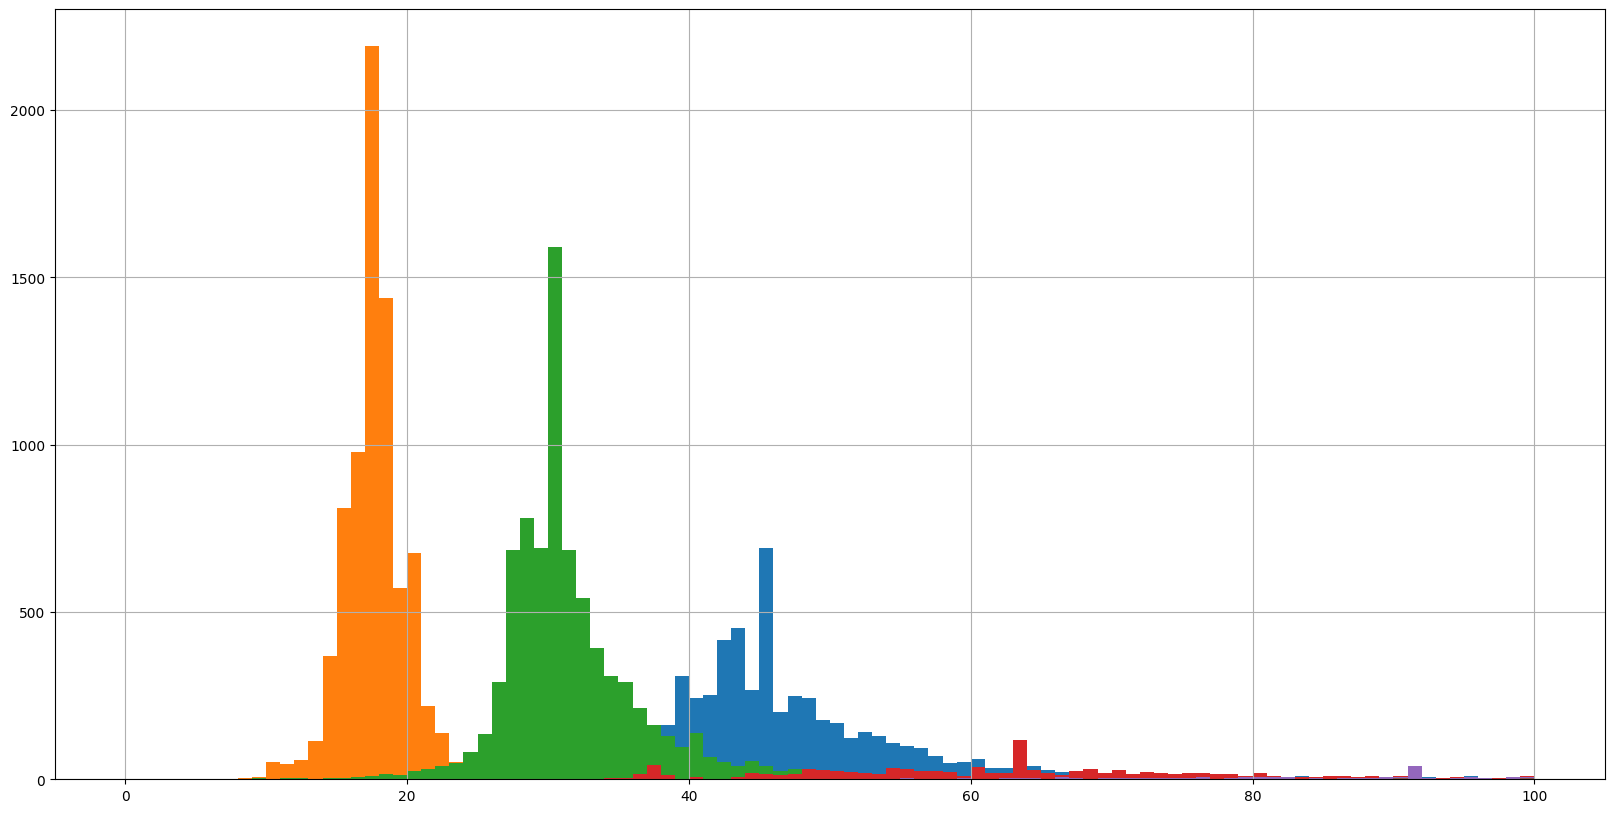

In [26]:
for i in data['rooms'].unique():
    data.loc[data['rooms'] == i, 'living_area'].hist(bins=100, range=(0, 100), figsize=(20, 10))

<Axes: >

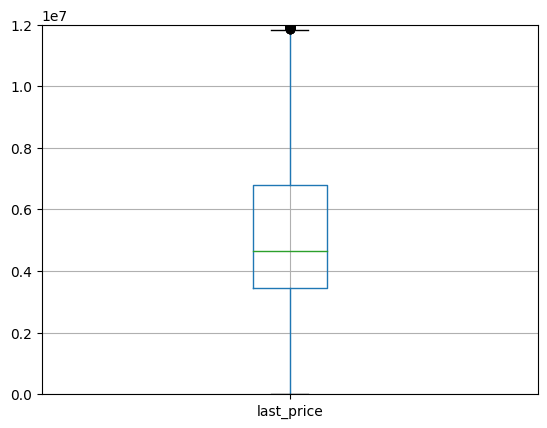

In [27]:
plt.ylim(0, 12000000)
data.boxplot(column='last_price', figsize=(30, 5))

Выбиваются значения выше 12 млн. Посмотрим их количество.

In [28]:
data.loc[data['last_price'] >= 12000000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 23684
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          1986 non-null   int64         
 1   last_price            1986 non-null   float64       
 2   total_area            1986 non-null   float64       
 3   first_day_exposition  1986 non-null   datetime64[ns]
 4   rooms                 1986 non-null   int64         
 5   ceiling_height        1986 non-null   float64       
 6   floors_total          1986 non-null   int64         
 7   living_area           1986 non-null   float64       
 8   floor                 1986 non-null   int64         
 9   is_apartment          1986 non-null   bool          
 10  studio                1986 non-null   bool          
 11  open_plan             1986 non-null   bool          
 12  kitchen_area          1986 non-null   float64       
 13  balcony          

Почти 2000. Значительный объем. Просто так отсекать его не будем. Оставим как есть.

Проверим Rooms

In [29]:
data.loc[data['last_price'] < 1000000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 164 to 23643
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          224 non-null    int64         
 1   last_price            224 non-null    float64       
 2   total_area            224 non-null    float64       
 3   first_day_exposition  224 non-null    datetime64[ns]
 4   rooms                 224 non-null    int64         
 5   ceiling_height        224 non-null    float64       
 6   floors_total          224 non-null    int64         
 7   living_area           224 non-null    float64       
 8   floor                 224 non-null    int64         
 9   is_apartment          224 non-null    bool          
 10  studio                224 non-null    bool          
 11  open_plan             224 non-null    bool          
 12  kitchen_area          224 non-null    float64       
 13  balcony         

<div class="alert alert-info">
224 значения меньше 1 млн. Даже в моем Саратове редкое жилье стоит так дешево. Что то тут не так.

In [30]:
print(data.loc[data['last_price'] < 1000000].describe())
print()
data.loc[data['last_price'] < 1000000, 'locality_name'].value_counts()
data.loc[data['locality_name'] == 'Сланцы', 'last_price'].mean()

       total_images     last_price  total_area       rooms  ceiling_height  \
count    224.000000     224.000000  224.000000  224.000000       224.00000   
mean       8.187500  767397.183036   41.932411    1.687500         2.63250   
std        4.859517  162719.252867   11.845889    0.702733         0.18116   
min        0.000000   12190.000000   18.000000    1.000000         2.50000   
25%        5.000000  650000.000000   32.000000    1.000000         2.58000   
50%        7.000000  790000.000000   41.000000    2.000000         2.65000   
75%       11.000000  900000.000000   47.250000    2.000000         2.65000   
max       20.000000  999999.000000  109.000000    4.000000         5.00000   

       floors_total  living_area       floor  kitchen_area     balcony  \
count    224.000000   224.000000  224.000000    224.000000  224.000000   
mean       4.111607    25.607902    2.732143      7.529911    0.294643   
std        2.147279     8.876058    2.192454      2.754230    0.578205   
m

873125.0

<div class="alert alert-info">
Сначала я подумал, что судя по малым жилым и общим площадям - это комнаты в коммунальных квартирах в старом жилом фонде. Но, оказалось - такое дешевое жилье в основном в н.п. Сланцы и еще нескольких населенных пунктах

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 52 to 23555
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          194 non-null    int64         
 1   last_price            194 non-null    float64       
 2   total_area            194 non-null    float64       
 3   first_day_exposition  194 non-null    datetime64[ns]
 4   rooms                 194 non-null    int64         
 5   ceiling_height        194 non-null    float64       
 6   floors_total          194 non-null    int64         
 7   living_area           194 non-null    float64       
 8   floor                 194 non-null    int64         
 9   is_apartment          194 non-null    bool          
 10  studio                194 non-null    bool          
 11  open_plan             194 non-null    bool          
 12  kitchen_area          194 non-null    float64       
 13  balcony          

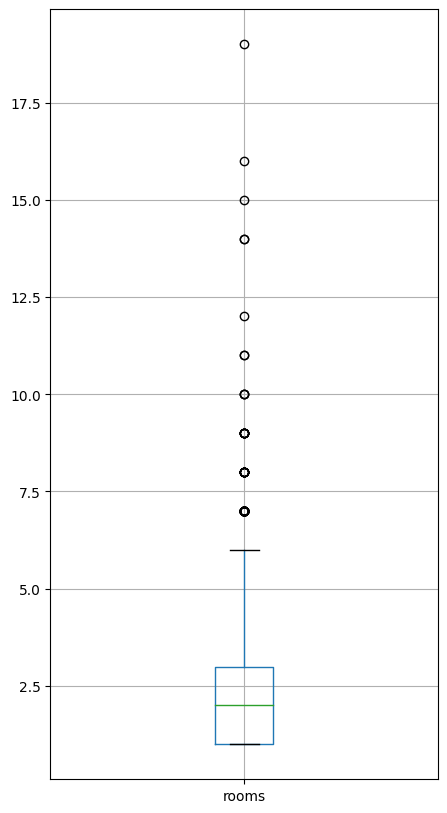

In [31]:
data.boxplot(column='rooms', figsize=(5, 10))
print (data.loc[data['rooms']>=6].info())
good_data = data.loc[data['rooms']<6]

194 квартиры с количеством комнат 6 и больше. Такие данные можно откинуть. Сохраним их в новую переменную.

In [32]:
good_data.loc[good_data['ceiling_height'] > 5]['ceiling_height'].value_counts()

25.0     7
27.0     7
8.0      3
32.0     2
5.3      2
20.0     1
10.3     1
27.5     1
22.6     1
6.0      1
8.3      1
14.0     1
5.5      1
26.0     1
24.0     1
5.6      1
100.0    1
Name: ceiling_height, dtype: int64

Потолки 8 и 10 метров могут быть, но 22 и 100 метров явная ошибка. Вероятно, не в том месте проставлена запятая и значения необходимо поделить на 10.

In [33]:
good_data.loc[good_data['ceiling_height'] < 2].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.20,0,Мга,0.0,0.0,0,5000.0,0,5000.0,248
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,5000.0,3,80.0,71
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13


<div class="alert alert-info">
3 значения ниже 2 метров. Предположу, что опечатка. Откинем их.

In [34]:
good_data = good_data.loc[good_data['ceiling_height'] >= 2]

In [35]:
import warnings
warnings.filterwarnings("ignore")
for height in good_data.loc[good_data['ceiling_height'] > 11]['ceiling_height']:
    #print (height)
    good_data.loc[good_data['ceiling_height'] == height, 'ceiling_height'] = good_data.loc[good_data['ceiling_height'] == height, 'ceiling_height'].replace(height, (height / 10), regex=True)
good_data['ceiling_height'].describe()

count    23222.00000
mean         2.69486
std          0.23644
min          1.40000
25%          2.60000
50%          2.65000
75%          2.70000
max         10.30000
Name: ceiling_height, dtype: float64

In [36]:
#good_data.boxplot(column=('living_area'), figsize=(5, 10))
#good_data['living_area'].describe()
good_data.loc[good_data['living_area'] > 90].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 35 to 23514
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          358 non-null    int64         
 1   last_price            358 non-null    float64       
 2   total_area            358 non-null    float64       
 3   first_day_exposition  358 non-null    datetime64[ns]
 4   rooms                 358 non-null    int64         
 5   ceiling_height        358 non-null    float64       
 6   floors_total          358 non-null    int64         
 7   living_area           358 non-null    float64       
 8   floor                 358 non-null    int64         
 9   is_apartment          358 non-null    bool          
 10  studio                358 non-null    bool          
 11  open_plan             358 non-null    bool          
 12  kitchen_area          358 non-null    float64       
 13  balcony          

Всего 358 значение площади более 90 кв.м. Откинем такие данные

<Axes: >

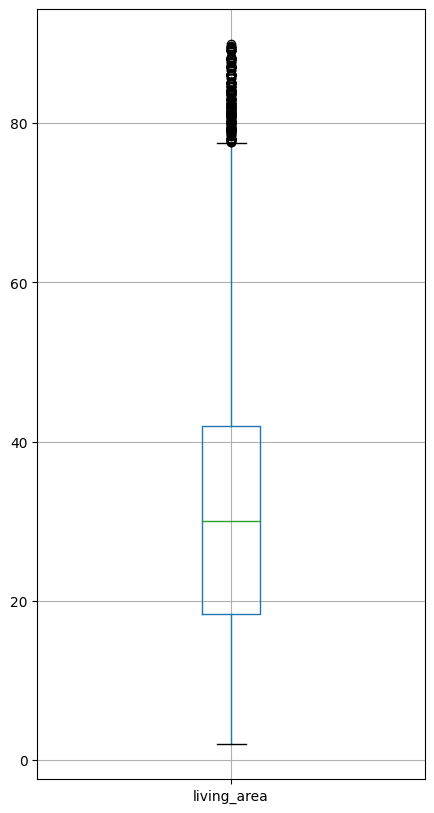

In [37]:
good_data = good_data.loc[good_data['living_area'] < 90]

good_data.boxplot(column=('living_area'), figsize=(5, 10))

count    22847.000000
mean        10.176163
std          5.082402
min          1.300000
25%          7.200000
50%          9.000000
75%         11.200000
max        107.000000
Name: kitchen_area, dtype: float64
Axes(0.125,0.11;0.775x0.77)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 51 to 22980
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          46 non-null     int64         
 1   last_price            46 non-null     float64       
 2   total_area            46 non-null     float64       
 3   first_day_exposition  46 non-null     datetime64[ns]
 4   rooms                 46 non-null     int64         
 5   ceiling_height        46 non-null     float64       
 6   floors_total          46 non-null     int64         
 7   living_area           46 non-null     float64       
 8   floor                 46 non-null     int64         
 9   is_apartmen

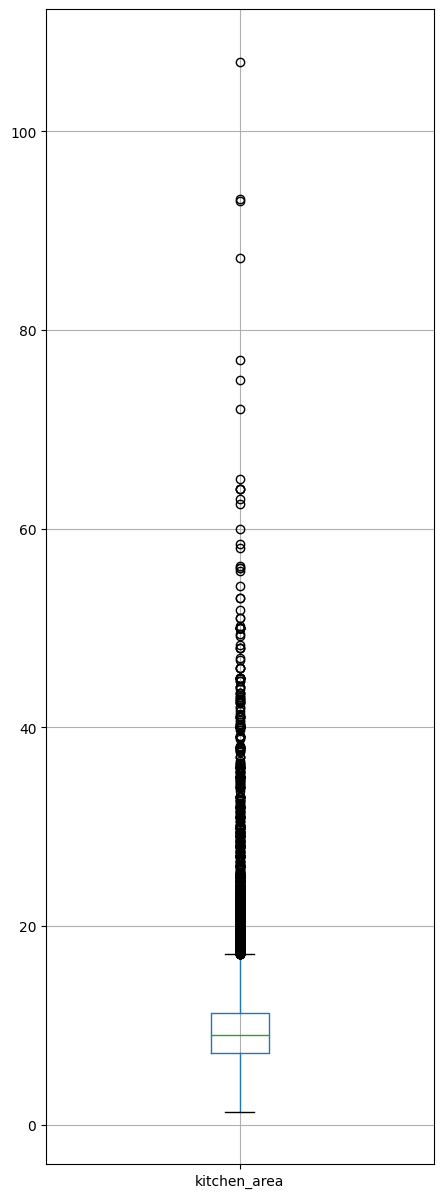

In [38]:
print (good_data['kitchen_area'].describe())
print (good_data.boxplot(column='kitchen_area', figsize=(5, 15)))
print (good_data.query('kitchen_area > 45').info())
good_data.query('kitchen_area < 3').info()

Площади кухни более 40 метров явно аномальные. Вероятно, при внесении данных ошиблоись с разрядом, аналогично с потолками. Перенесем запятые на место в значениях более 45 кв. метров (таких значений всего 46). Значения же менее 3 кв.метров , наоборот, умножим на 10 (таких значений 11).

In [39]:
for square in good_data.loc[good_data['kitchen_area'] > 45]['kitchen_area']:
    #print (square)
    good_data.loc[good_data['kitchen_area'] == square, 'kitchen_area'] = \
    good_data.loc[good_data['kitchen_area'] == square, 'kitchen_area'].replace(square, (square / 10), regex=True)
for square in good_data.loc[good_data['kitchen_area'] < 3]['kitchen_area']:
    #print (square)
    good_data.loc[good_data['kitchen_area'] == square, 'kitchen_area'] = \
    good_data.loc[good_data['kitchen_area'] == square, 'kitchen_area'].replace(square, (square * 10), regex=True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22847 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22847 non-null  int64         
 1   last_price            22847 non-null  float64       
 2   total_area            22847 non-null  float64       
 3   first_day_exposition  22847 non-null  datetime64[ns]
 4   rooms                 22847 non-null  int64         
 5   ceiling_height        22847 non-null  float64       
 6   floors_total          22847 non-null  int64         
 7   living_area           22847 non-null  float64       
 8   floor                 22847 non-null  int64         
 9   is_apartment          22847 non-null  bool          
 10  studio                22847 non-null  bool          
 11  open_plan             22847 non-null  bool          
 12  kitchen_area          22847 non-null  float64       
 13  balcony         

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 3 to 23694
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          320 non-null    int64         
 1   last_price            320 non-null    float64       
 2   total_area            320 non-null    float64       
 3   first_day_exposition  320 non-null    datetime64[ns]
 4   rooms                 320 non-null    int64         
 5   ceiling_height        320 non-null    float64       
 6   floors_total          320 non-null    int64         
 7   living_area           320 non-null    float64       
 8   floor                 320 non-null    int64         
 9   is_apartment          320 non-null    bool          
 10  studio                320 non-null    bool          
 11  open_plan             320 non-null    bool          
 12  kitchen_area          320 non-null    float64       
 13  balcony           

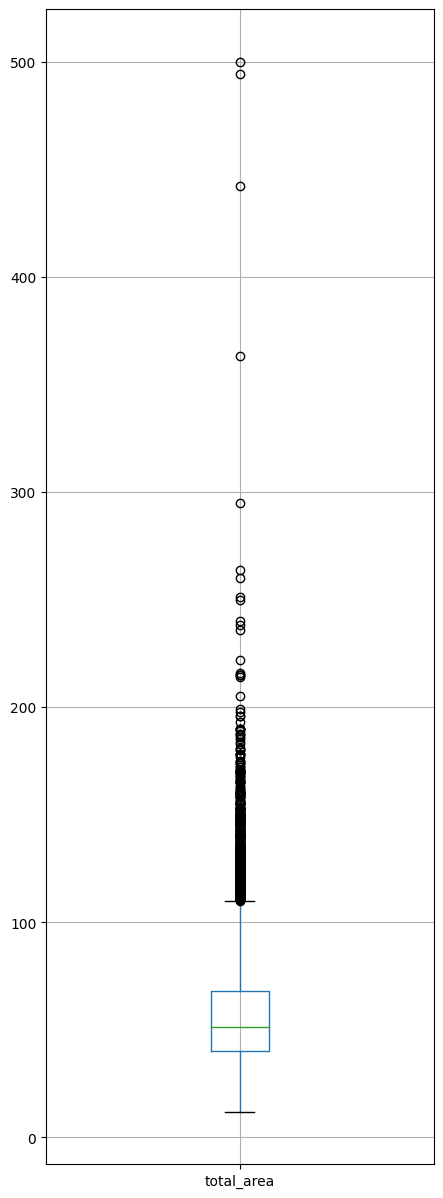

In [40]:
#print (good_data['total_area'].describe())
good_data.boxplot(column='total_area', figsize=(5, 15))
good_data.query('total_area > 130').info()

Что же, квартиры по 500 кв.м. вполне реальны и я очень хочу такую купить, но для чистоты анализа откинем квартиры более 130 кв.м как выбросы.

In [41]:
good_data = good_data.loc[good_data['total_area'] < 130]


<Axes: >

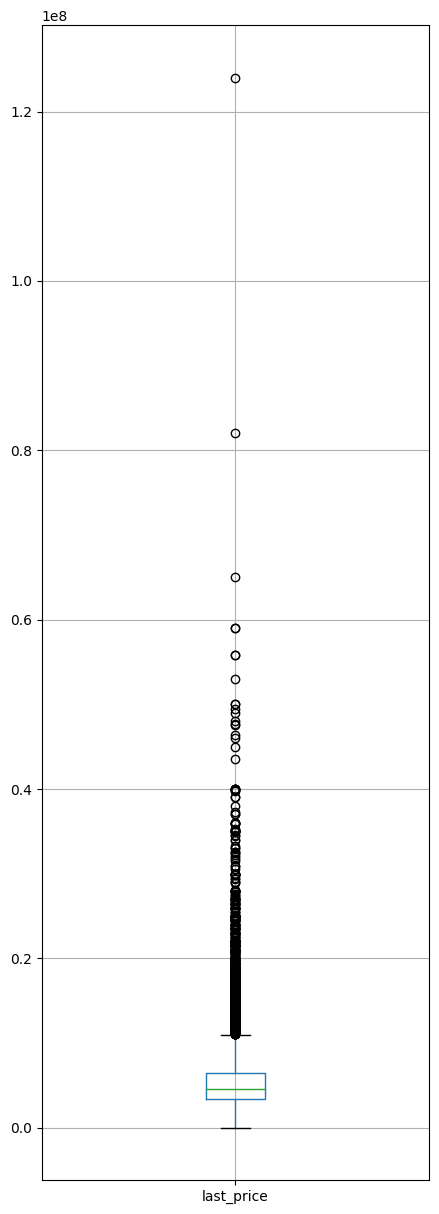

In [42]:
good_data.boxplot(column='last_price', figsize=(5, 15))

Достаточно большие выбросы на некоторые квартиры. Удилим их.

<Axes: >

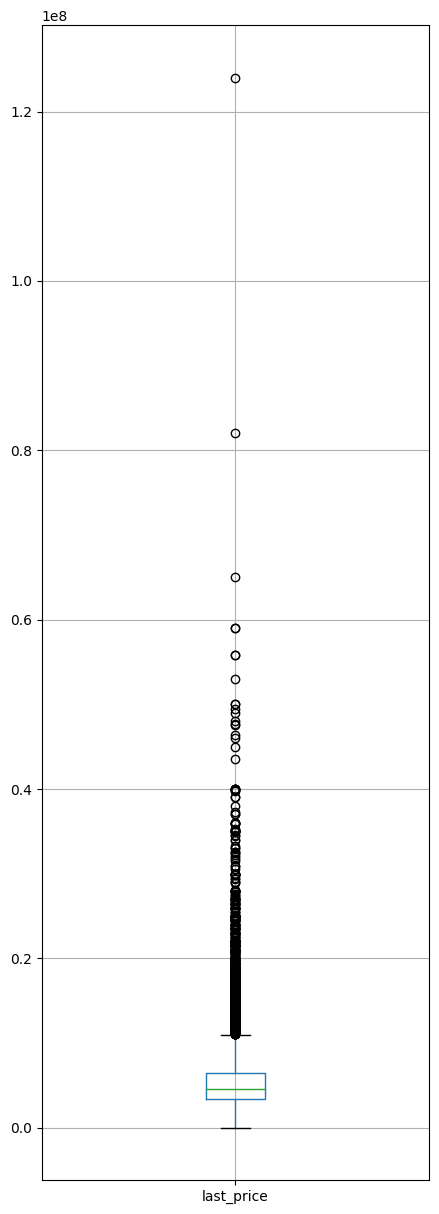

In [43]:
good_data.boxplot(column='last_price', figsize=(5, 15))

<div class="alert alert-info">
На этапе предобработки данных были обнаружены отклонения в предоставленных данных - пропуски, аномально большие и аномально малые значения.
    
Часть из них удалось заполнить медианными значениями (ceiling_height, living_area, kitchen_area, days_exposition)
    
Часть пришлось удалить (floors_total)
часть заполнили намеренно выделяющимися данными, чтобы можно было их определить как выбросы (locality_name, parks_nearest, ponds_nearest и т.д).
По итогу имеем датасет, с которым можно работать далее. Приступим.

### Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Добавляем цену кв.метра. делим значения столбца last_price на total_area. Окргулим до копеек

In [44]:
good_data['square_price'] = good_data['last_price'] / good_data['total_area']
good_data['square_price'] = good_data['square_price'].round(2)
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,2,Шушары,12817.0,18603.0,0,5000.0,0,5000.0,81,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,Янино-1,0.0,0.0,0,5000.0,0,5000.0,55,95065.79
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,1,Парголово,52996.0,19143.0,0,5000.0,0,5000.0,155,99195.71
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0,5000.0,0,5000.0,95,110544.69
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,Мурино,0.0,0.0,0,5000.0,0,5000.0,189,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0,5000.0,0,5000.0,289,88524.59
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.25


Добавим день публикации объявления, месяц и год публикации объявления.

In [45]:
good_data['week_day'] = good_data['first_day_exposition'].dt.weekday
good_data['month'] = good_data['first_day_exposition'].dt.month
good_data['year'] = good_data['first_day_exposition'].dt.year
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,week_day,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.0,1,482.0,2,755.0,95,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,18603.0,0,5000.0,0,5000.0,81,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0.0,0,5000.0,0,5000.0,55,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,19143.0,0,5000.0,0,5000.0,155,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,11634.0,0,5000.0,0,5000.0,95,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0.0,0,5000.0,0,5000.0,189,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,15008.0,0,5000.0,0,5000.0,289,88524.59,6,2,2017
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,13878.0,1,310.0,2,553.0,137,127525.25,3,11,2017


Добавим тип этажа квартиры (значения — «первый», «последний», «другой»).

In [46]:
def floortype(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
good_data['floor_type'] = good_data.apply(floortype, axis=1)
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,week_day,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.0,2,755.0,95,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,5000.0,0,5000.0,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,1,90.0,2,574.0,558,92785.71,3,8,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2,112.0,1,48.0,121,100000.00,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,5000.0,0,5000.0,55,95065.79,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,5000.0,0,5000.0,155,99195.71,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,0,5000.0,0,5000.0,95,110544.69,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,5000.0,0,5000.0,189,87454.76,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,5000.0,0,5000.0,289,88524.59,6,2,2017,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,1,310.0,2,553.0,137,127525.25,3,11,2017,другой


Добавим расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [47]:
good_data['cityCenters_nearest_km'] = (good_data['cityCenters_nearest'] / 1000).round(0).astype(int)
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,week_day,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,95,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,5000.0,0,5000.0,81,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2,574.0,558,92785.71,3,8,2015,другой,14
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1,48.0,121,100000.00,1,6,2018,другой,8
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,5000.0,0,5000.0,55,95065.79,0,9,2018,другой,0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,5000.0,0,5000.0,155,99195.71,3,11,2017,другой,19
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,5000.0,0,5000.0,95,110544.69,3,4,2019,другой,12
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,5000.0,0,5000.0,189,87454.76,2,5,2018,другой,0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,5000.0,0,5000.0,289,88524.59,6,2,2017,другой,15
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,310.0,2,553.0,137,127525.25,3,11,2017,другой,14


### Проведите исследовательский анализ данных

Изучите следующие параметры объектов:
     
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

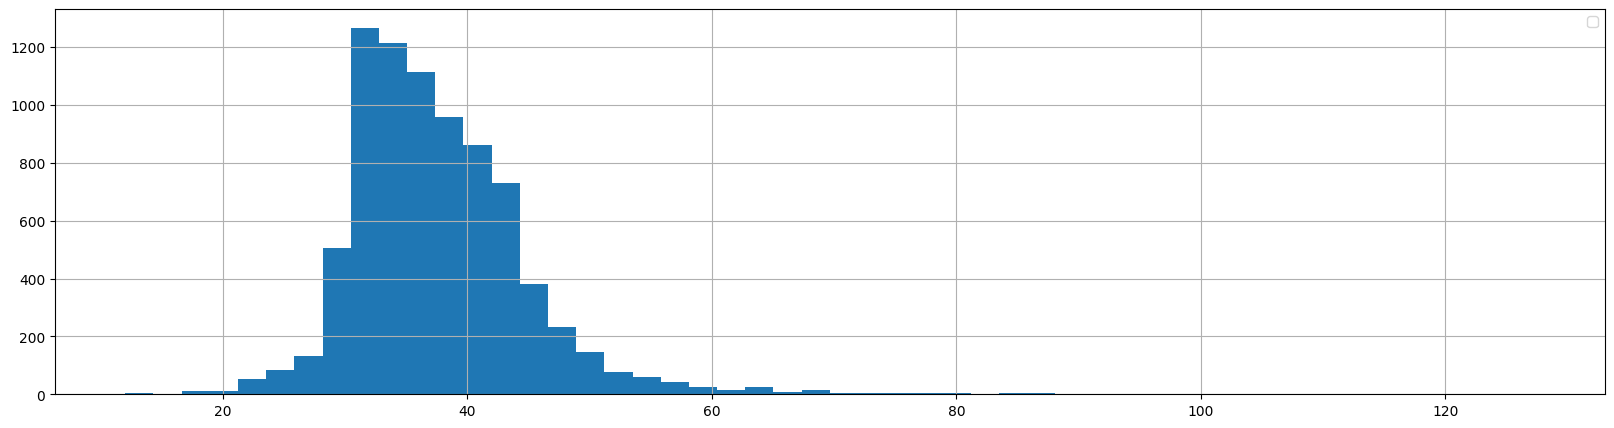

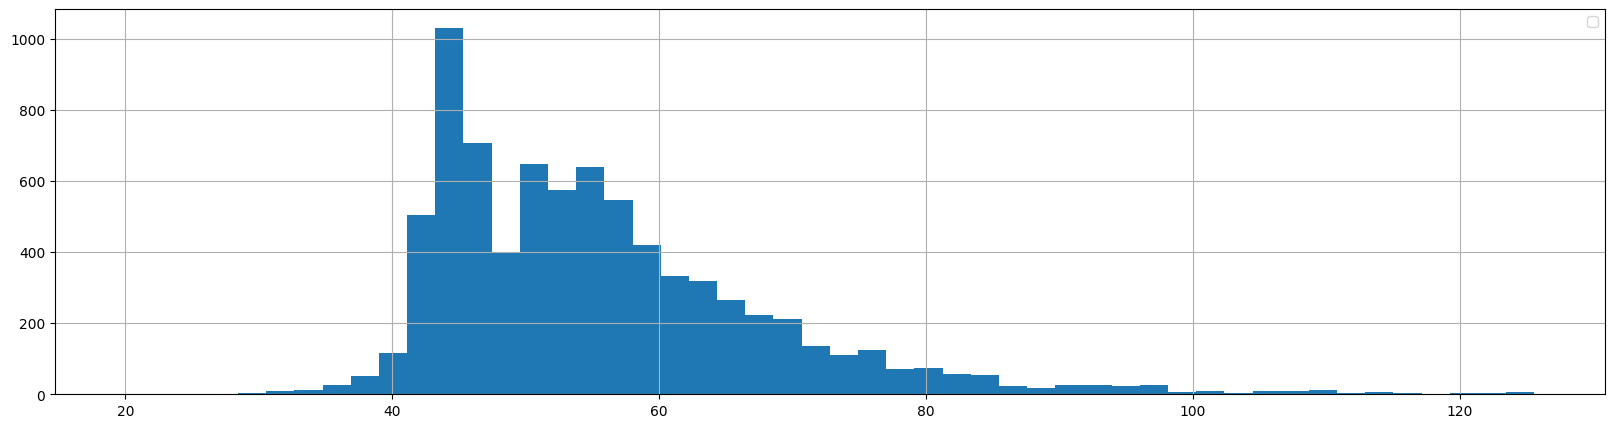

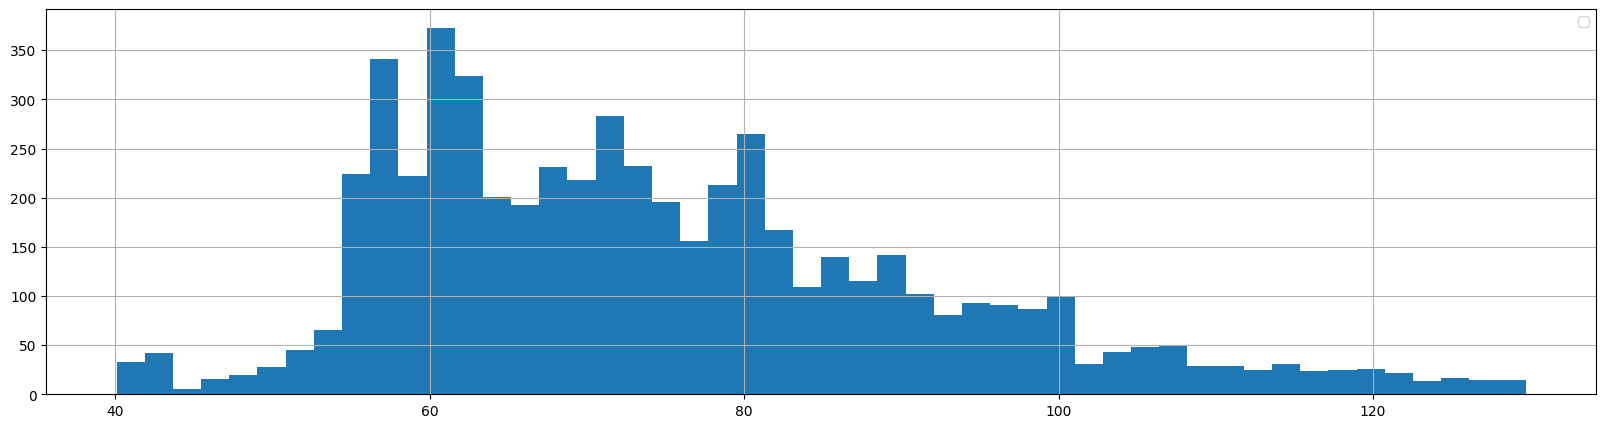

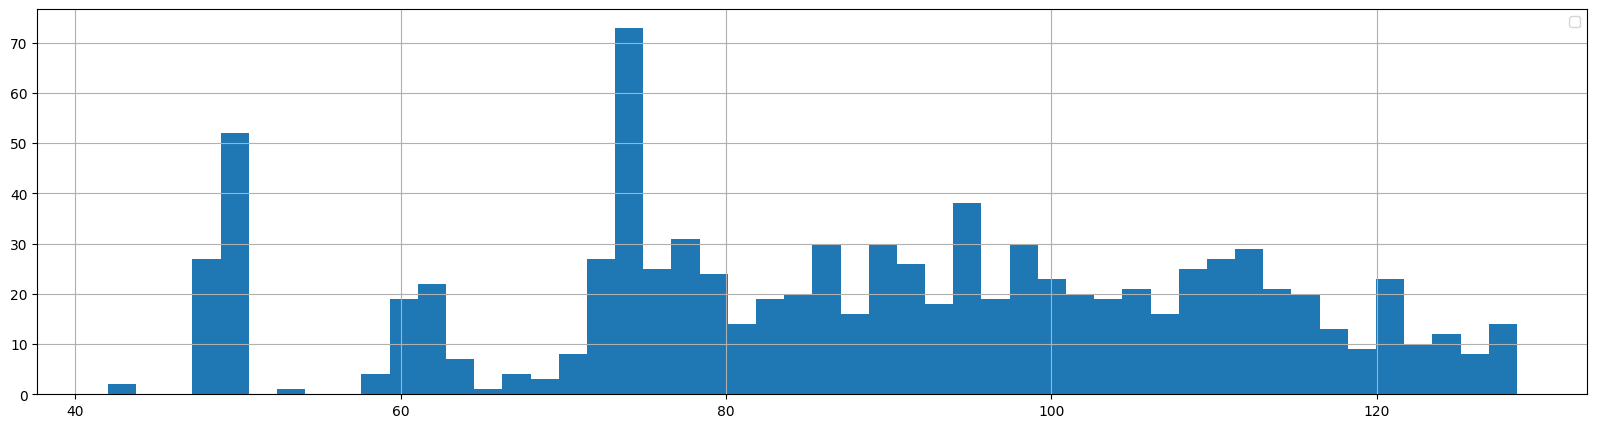

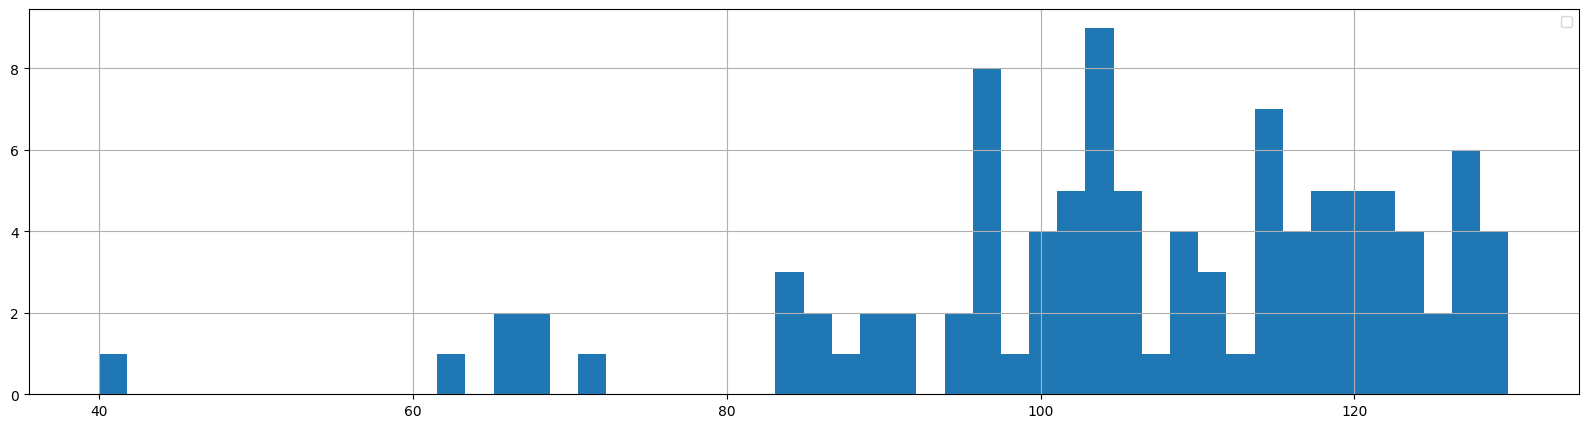

In [48]:
leg=[1]
for i in good_data['rooms'].sort_values().unique() :
    leg.append(i+1)
    plt.legend(leg)
    good_data.loc[good_data['rooms'] == i, 'total_area'].hist(bins=50, figsize=(20, 5))
    plt.show()


Для 1,2,3-х комнатных квартир распределение выглядит достаточно нормально, хотя на двух комнатных квартирах есть не вполне объяснимый провал в районе 50 кв.м. Архитекторы боятся двушек с площадью 50 кв.м?
А вот некоторые 4 и 5 комнатные квартиры обладают площадью по 60 кв.метров и меньше. Это выбивается из общей колеи. Посмотрим сколько таких строк.

In [49]:
good_data.query('rooms > 3 and total_area < 60').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 542 to 23464
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            89 non-null     int64         
 1   last_price              89 non-null     float64       
 2   total_area              89 non-null     float64       
 3   first_day_exposition    89 non-null     datetime64[ns]
 4   rooms                   89 non-null     int64         
 5   ceiling_height          89 non-null     float64       
 6   floors_total            89 non-null     int64         
 7   living_area             89 non-null     float64       
 8   floor                   89 non-null     int64         
 9   is_apartment            89 non-null     bool          
 10  studio                  89 non-null     bool          
 11  open_plan               89 non-null     bool          
 12  kitchen_area            89 non-null     float64

Таких значений 89. Вероятно, ошиблись при внесении данных о количеcтве комнат. Удалим их.

In [50]:
bad_index = good_data.query('rooms > 3 and total_area < 60').index
good_data.drop(bad_index, inplace=True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22418 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22418 non-null  int64         
 1   last_price              22418 non-null  float64       
 2   total_area              22418 non-null  float64       
 3   first_day_exposition    22418 non-null  datetime64[ns]
 4   rooms                   22418 non-null  int64         
 5   ceiling_height          22418 non-null  float64       
 6   floors_total            22418 non-null  int64         
 7   living_area             22418 non-null  float64       
 8   floor                   22418 non-null  int64         
 9   is_apartment            22418 non-null  bool          
 10  studio                  22418 non-null  bool          
 11  open_plan               22418 non-null  bool          
 12  kitchen_area            22418 non-null  float6

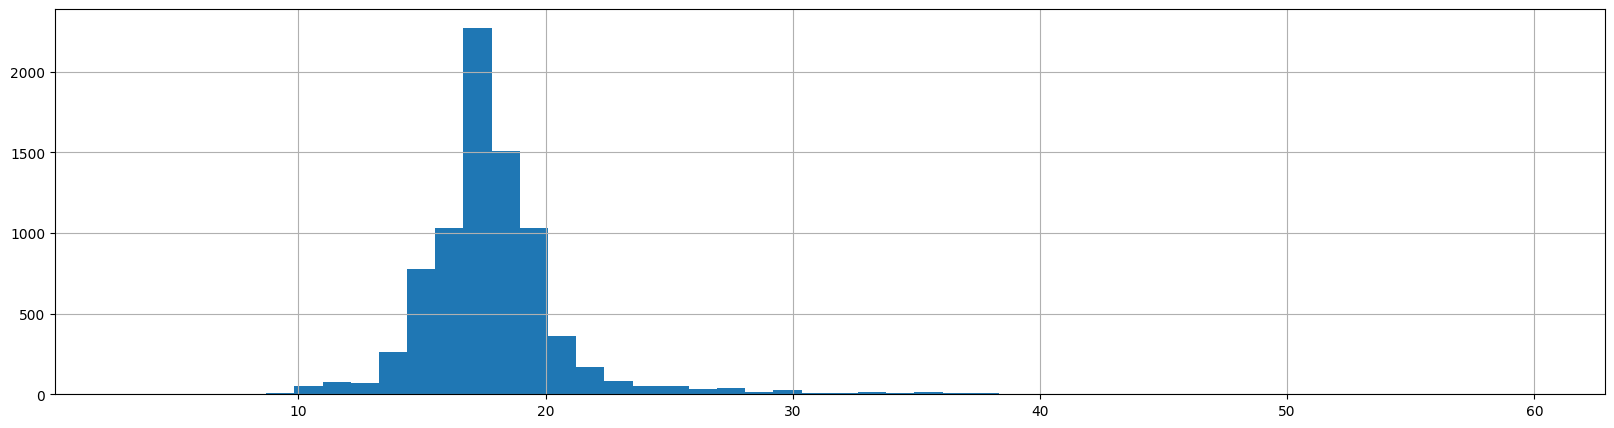

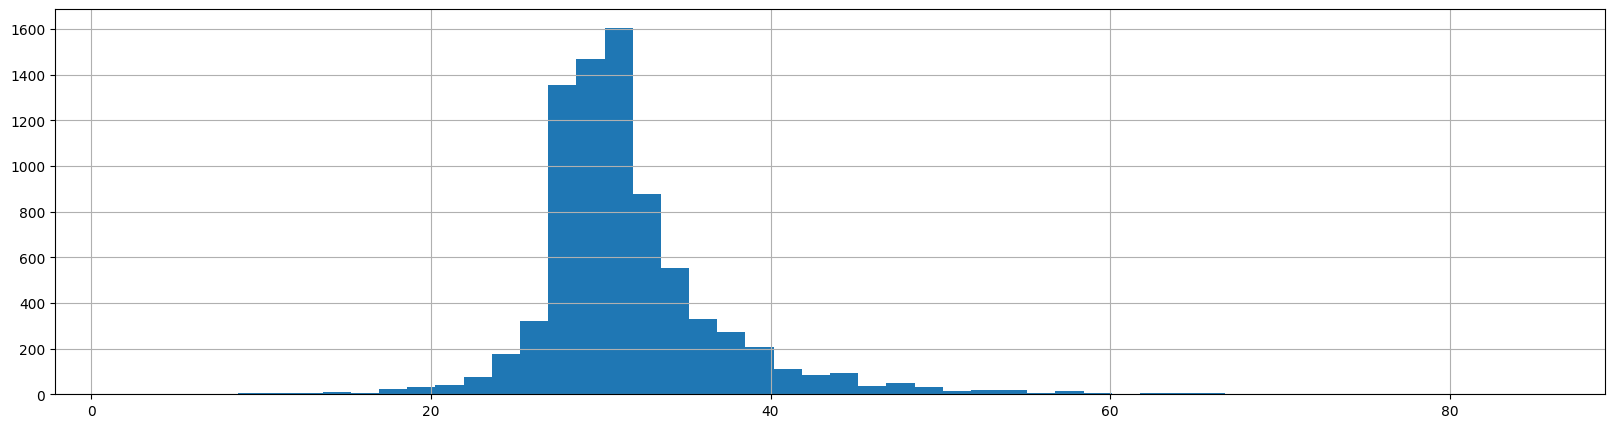

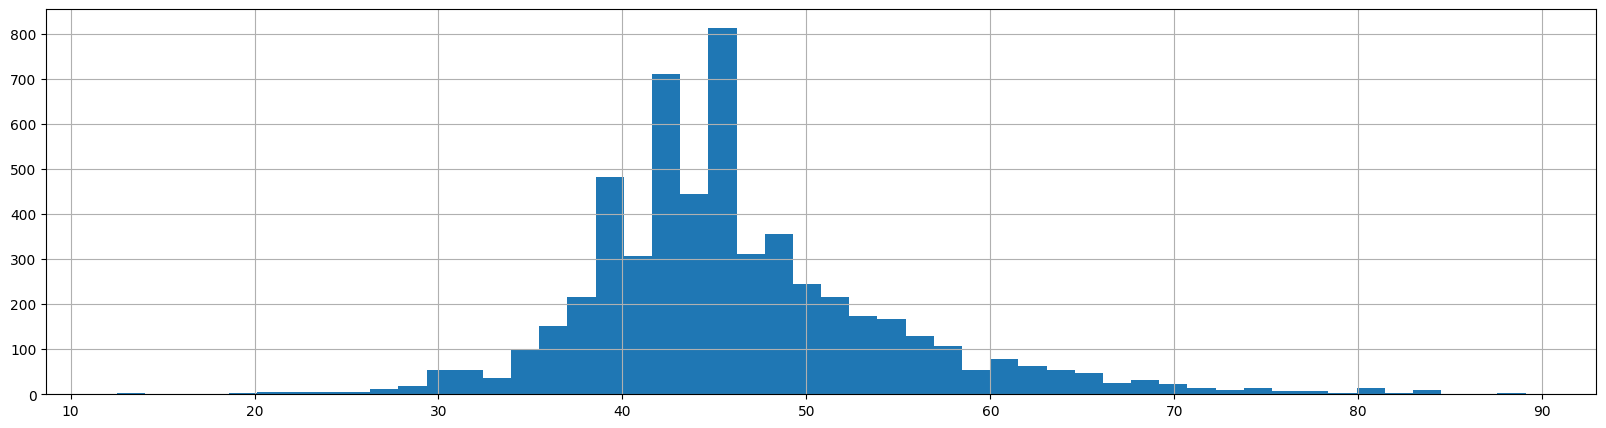

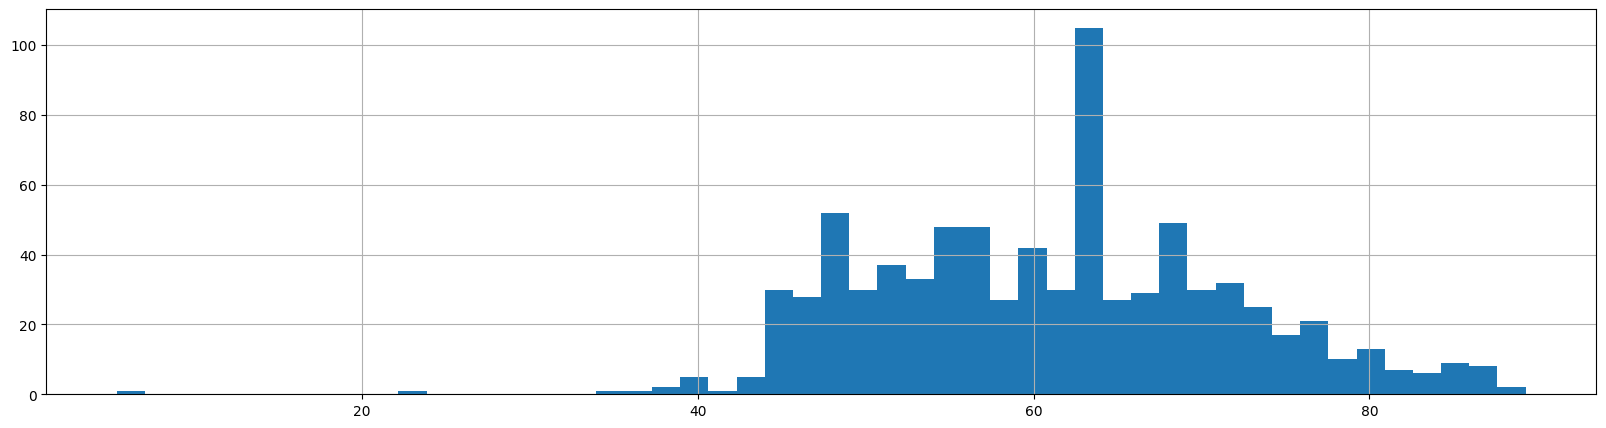

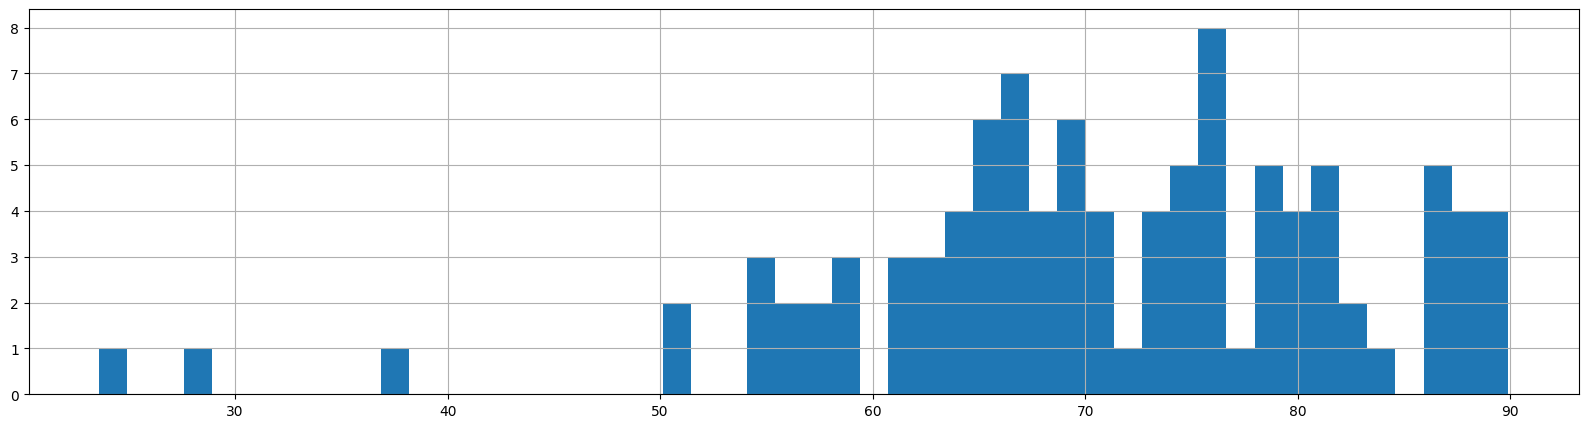

In [51]:
for i in good_data['rooms'].sort_values().unique() :
    good_data.loc[good_data['rooms'] == i, 'living_area'].hist(bins=50, figsize=(20, 5))
    plt.show()

По значениям жилой площади для 1,2,3 комнатных квартир сильных отклонений от нормального распределения не видно. На 3 комнатных провал на 45 кв.метрах, но это можно объяснить типовыми застройками.

В случае 4 и 5 комнатных квартир идут сильные пики на диаграммах

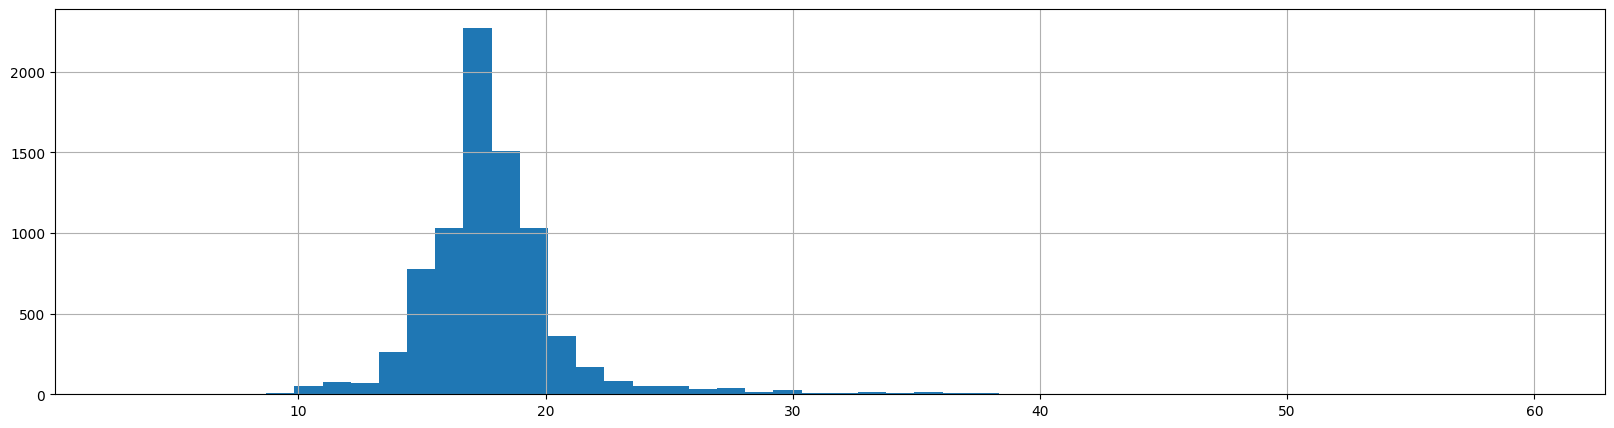

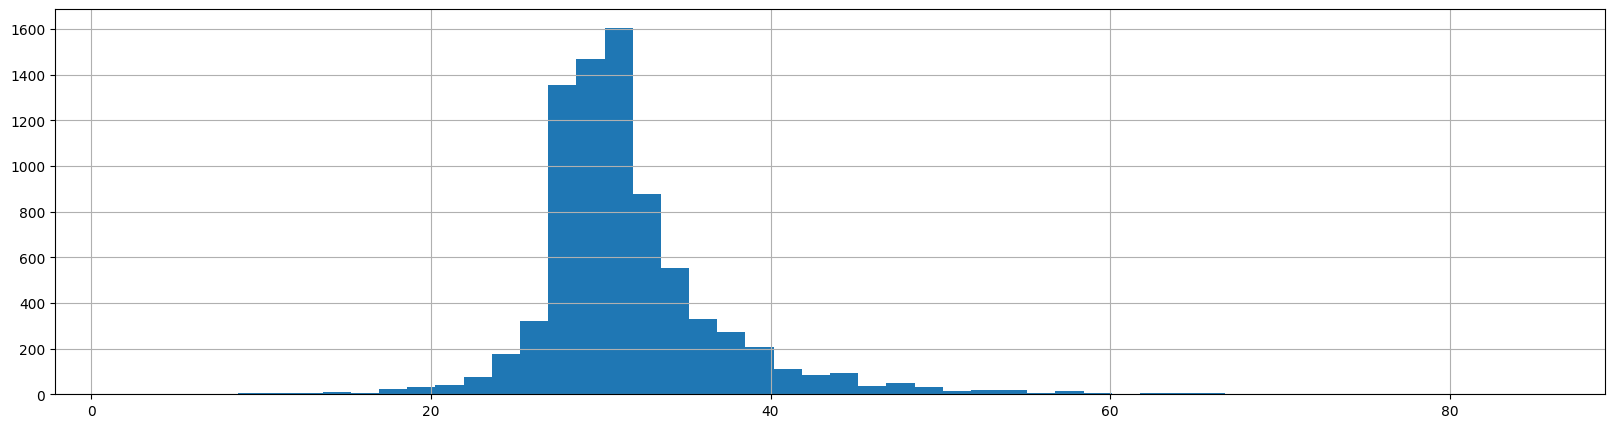

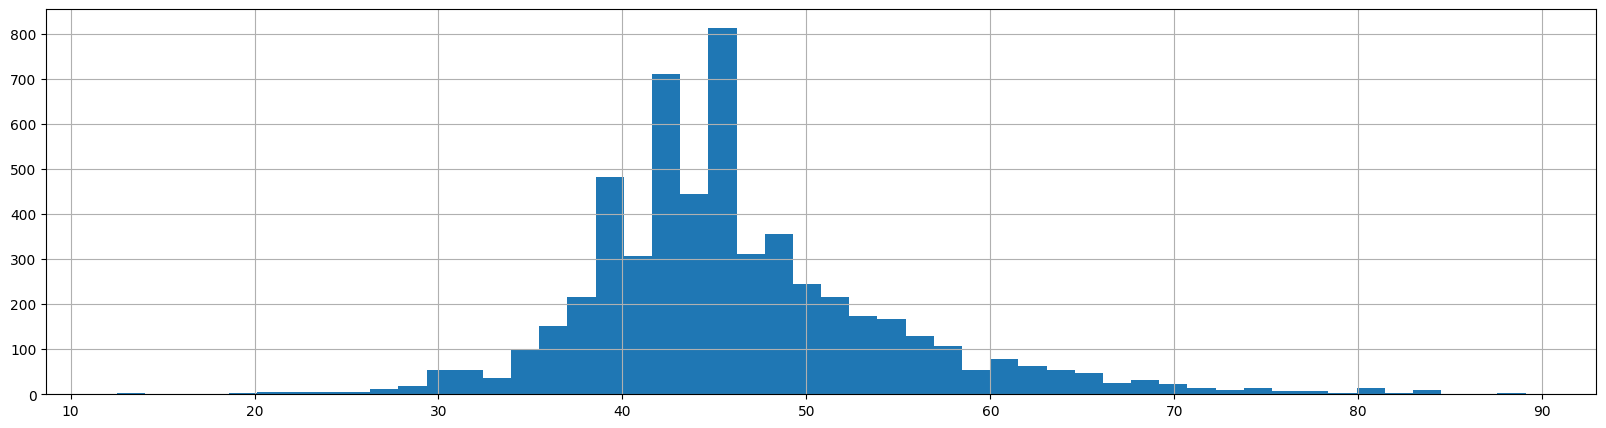

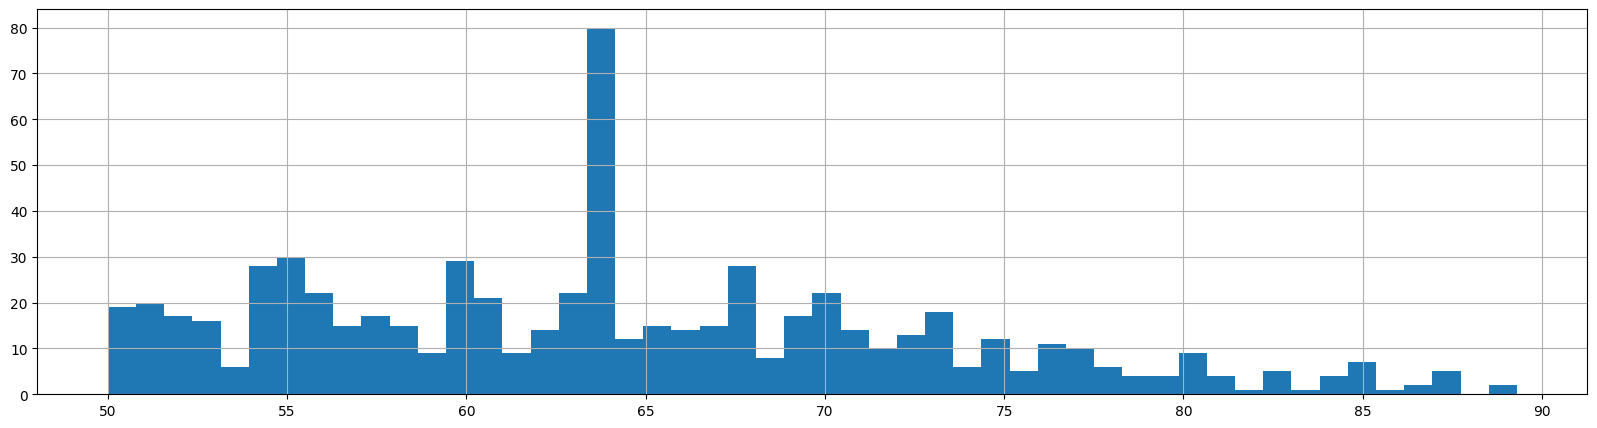

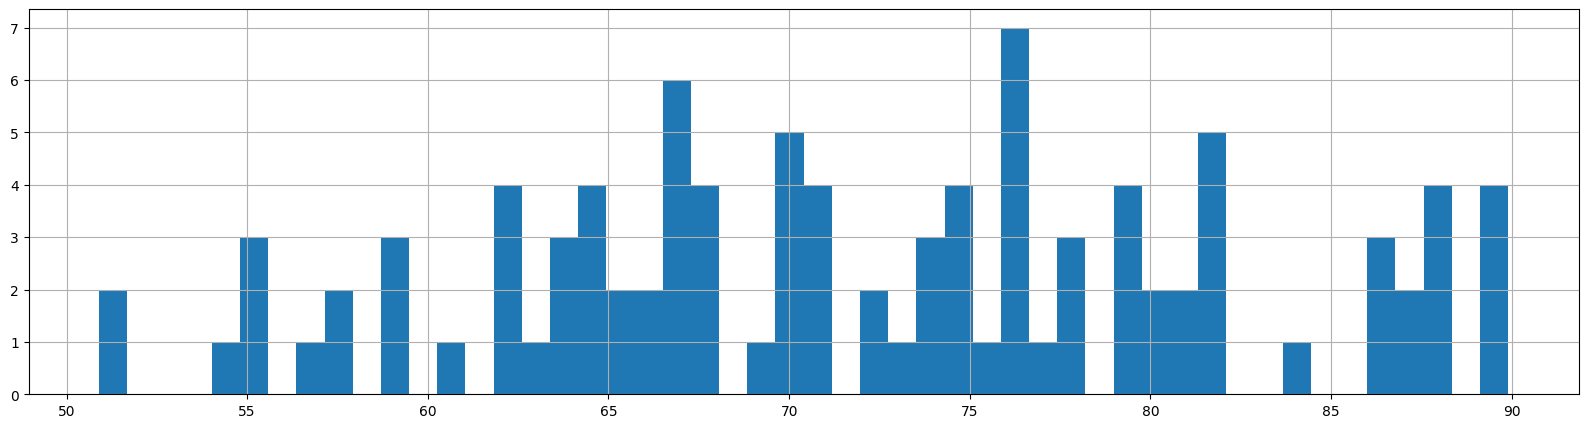

In [52]:
# Вероятно, при занесении данных неверно внесли площадь.
# отбросим такие значения
bad_index = good_data.query('rooms > 3 and living_area < 50').index
good_data.drop(bad_index, inplace=True)
for i in good_data['rooms'].sort_values().unique() :
    good_data.loc[good_data['rooms'] == i, 'living_area'].hist(bins=50, figsize=(20, 5))
    plt.show()

Общая картина стала лучше, но разброс все равно достаточно сильный. Это может объясняться тем фактом, что жильцы переделывали свои квартиры в 4-5 комнатные из 2 и 3 комнатных, разделяя перегородками существующие комнаты.

<Axes: >

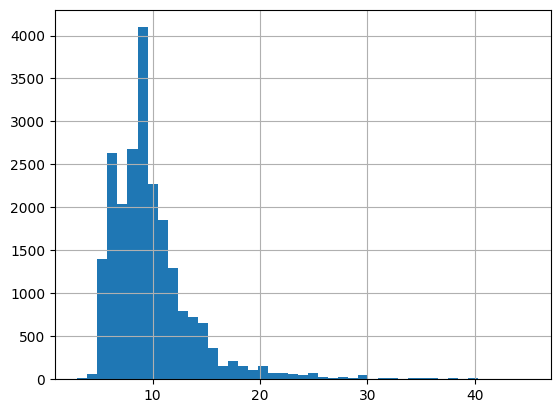

In [53]:
good_data['kitchen_area'].hist(bins=45)

Распределение выглядит нормальным, если не считать кухни размером 35-45 метров. Посмотрим, сколько таких выделяющихся значений

In [54]:
good_data.query('kitchen_area > 35').info(10)
good_data.query('kitchen_area > 35').head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 4 to 23134
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            78 non-null     int64         
 1   last_price              78 non-null     float64       
 2   total_area              78 non-null     float64       
 3   first_day_exposition    78 non-null     datetime64[ns]
 4   rooms                   78 non-null     int64         
 5   ceiling_height          78 non-null     float64       
 6   floors_total            78 non-null     int64         
 7   living_area             78 non-null     float64       
 8   floor                   78 non-null     int64         
 9   is_apartment            78 non-null     bool          
 10  studio                  78 non-null     bool          
 11  open_plan               78 non-null     bool          
 12  kitchen_area            78 non-null     float64  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,week_day,month,year,floor_type,cityCenters_nearest_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000.00,1,6,2018,другой,8
379,14,21000000.0,96.0,2017-02-07,2,3.00,7,20.0,1,False,...,5000.0,3,418.0,153,218750.00,1,2,2017,первый,2
723,9,5850000.0,81.0,2018-05-04,2,2.65,5,30.0,5,False,...,292.0,1,426.0,176,72222.22,4,5,2018,последний,6
1257,6,18700000.0,122.1,2015-09-24,2,2.65,5,38.3,3,False,...,5000.0,0,5000.0,95,153153.15,3,9,2015,другой,15
1804,20,13800000.0,114.0,2018-10-29,3,3.40,5,51.0,2,False,...,2665.0,3,282.0,95,121052.63,0,10,2018,другой,9
2023,9,14700000.0,113.0,2017-07-19,3,2.75,6,55.6,2,False,...,5000.0,0,5000.0,95,130088.50,2,7,2017,другой,26
2251,20,19950000.0,115.5,2017-04-14,3,2.75,20,60.0,9,False,...,288.0,3,311.0,256,172727.27,4,4,2017,другой,11
2309,10,4200000.0,62.4,2017-06-15,2,2.60,9,8.4,6,False,...,5000.0,0,5000.0,111,67307.69,3,6,2017,другой,29
2443,18,15000000.0,72.0,2016-04-25,2,3.66,5,21.3,5,False,...,508.0,1,267.0,85,208333.33,0,4,2016,последний,2
2685,12,21615000.0,100.0,2018-04-03,2,2.65,10,57.0,9,False,...,392.0,2,359.0,90,216150.00,1,4,2018,другой,8


78 значений. В некоторых строчках очевидно перепутаны значения жилой площади и площади кухни. Удалим такие.
Также вероятно, подразумеватся, что некоторые жильцы объединили кухню с комнатой и вносят ее в площадь кухни.

In [55]:
good_data.drop(good_data.query('kitchen_area > 35 & living_area < 12').index, inplace=True)

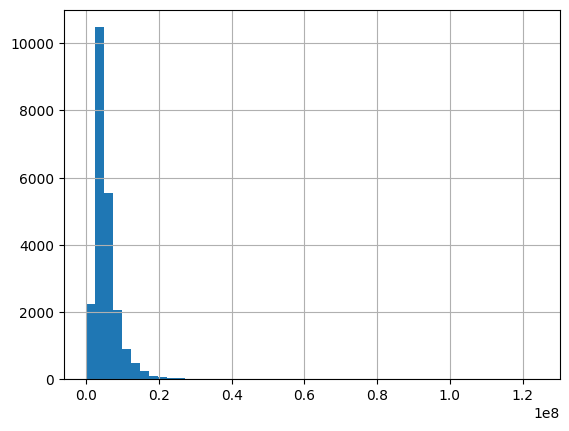

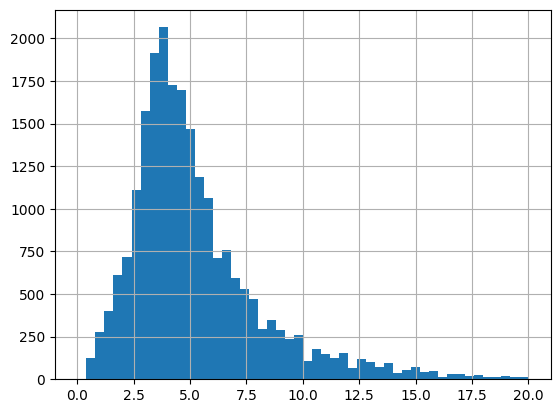

count    22276.000000
mean         5.514091
std          3.951795
min          0.012190
25%          3.400000
50%          4.550000
75%          6.450000
max        124.000000
Name: price_mln, dtype: float64


In [56]:
good_data['last_price'].hist(bins=50)
plt.show()
good_data['price_mln'] = good_data['last_price'] / 1000000 # для удобства прочтения сделаем столбец с ценой в млн.руб.
good_data.query('price_mln < 20')['price_mln'].hist(bins=50)
plt.show()
print (good_data['price_mln'].describe())
plt.show()

Некоторые цены улетают в небеса. Но в целом распределение нормальное.

Средняя цена за квартиру - 4,5-5,5 млн.руб

<Axes: >

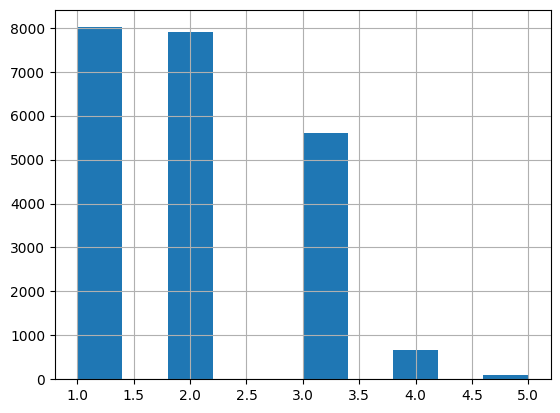

In [57]:
good_data['rooms'].hist()

Ожидаемо, что наибольшей текучкой на рынке являются 1 и 2 комнатные квартиры. Наиболее редкими являются квартиры от 4 комнат и больше.

<Axes: >

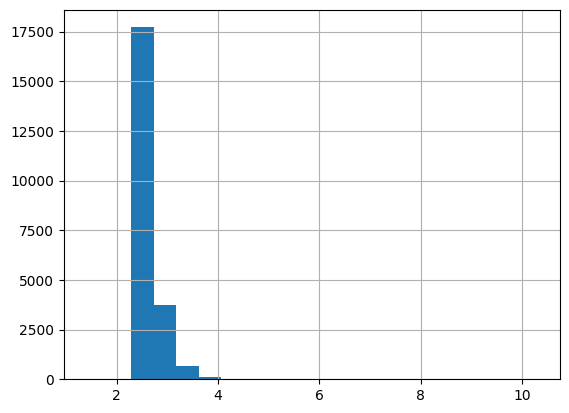

In [58]:
good_data['ceiling_height'].hist(bins=20)

Высота потолков ожидаемо в большей части случаев равна от 2,5 до 3 метров.

In [59]:
print (good_data.query('ceiling_height > 4')['locality_name'].value_counts())

Санкт-Петербург    28
Бокситогорск        1
Токсово             1
Выборг              1
Нурма               1
Всеволожск          1
Пушкин              1
Красное Село        1
Name: locality_name, dtype: int64


Очень высокие потолки встречаются очень редко и в основном находятся в СПБ. Лишь 7 находятся за пределами СПБ. Вероятнее всего - дома старой постройки.

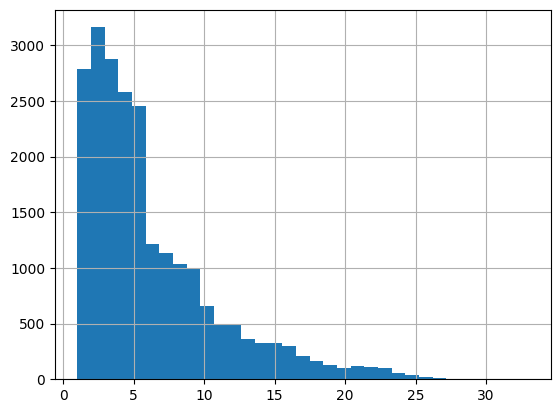

<Axes: >

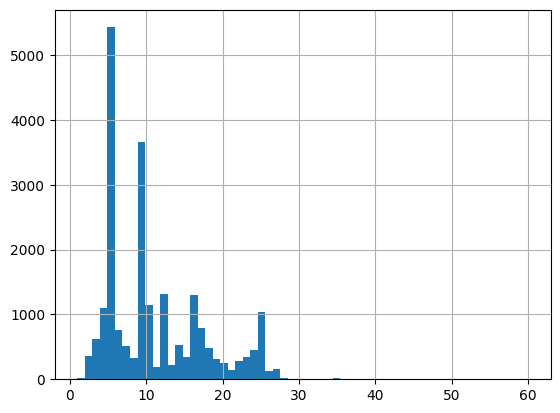

In [60]:
good_data['floor'].hist(bins=(good_data['floor'].max()))
plt.show()
good_data['floors_total'].hist(bins=(good_data['floors_total'].max()))

В продаже чаще всего жилье в 5, 9, 12, 15-этажных домах, что объясняется типовой застройкой

Средняя цена за квартиры на 1 этаже: 4.376 млн.р
Средняя цена за квартиры на средних этажах: 5.784 млн.р
Средняя цена за квартиры на последних этажах: 5.11 млн.р
Средняя цена за кв.м. на 1 этаже: 80797.356 р
Средняя цена за кв.м на средних этажах: 101189.8 р
Средняя цена за кв.м на последних этажах: 88281.177 р


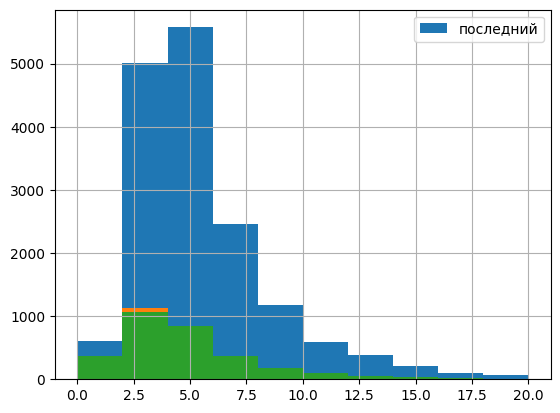

In [61]:
#good_data['floor_type'].hist()
leg=[]
for i in good_data['floor_type'].unique():
    #leg.append(i)
    good_data.loc[good_data['floor_type'] == i, 'price_mln'].hist(range=(0, 20))
    plt.legend([i])
    plt.legend([i])
#good_data['floor_type'].unique()
print('Средняя цена за квартиры на 1 этаже:', good_data.loc[good_data['floor_type'] == 'первый', 'price_mln'].mean()\
      .round(3), 'млн.р')
print('Средняя цена за квартиры на средних этажах:', good_data.loc[good_data['floor_type'] == 'другой',\
                                                                   'price_mln'].mean().round(3), 'млн.р')
print('Средняя цена за квартиры на последних этажах:', good_data.loc[good_data['floor_type'] == 'последний',\
                                                                   'price_mln'].mean().round(3), 'млн.р')
print('Средняя цена за кв.м. на 1 этаже:', good_data.loc[good_data['floor_type'] == 'первый', 'square_price'].mean()\
      .round(3), 'р')
print('Средняя цена за кв.м на средних этажах:', good_data.loc[good_data['floor_type'] == 'другой',\
                                                                   'square_price'].mean().round(3), 'р')
print('Средняя цена за кв.м на последних этажах:', good_data.loc[good_data['floor_type'] == 'последний',\
                                                                   'square_price'].mean().round(3), 'р')

Как видим, дешевле всего квартиры на 1 и последнем этажах.

array(['Ломоносов', 'Кронштадт', 'Петергоф', 'Зеленогорск'], dtype=object)

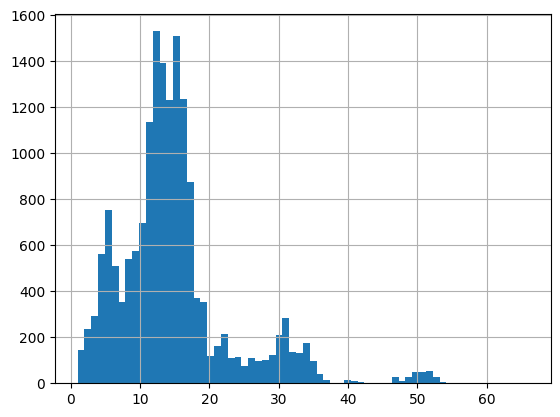

In [62]:
#т.к. мы заполняли пропуски в этой графе значением "0", то исключим из выборки эти значения
good_data.query('cityCenters_nearest_km > 0')['cityCenters_nearest_km'].\
hist(bins=(good_data['cityCenters_nearest_km'].max()))
good_data.query('45 < cityCenters_nearest_km < 55')['locality_name'].unique()

До 20 км идут квартиры в пределах Санкт-Петербурга, потом начинаются пригороды и количество квартир резко падает. Небольшой всплеск наблюдается в отдалении 50 км, где находятся Ломоносов, Кронштадт, Петергоф, Зеленогорск.

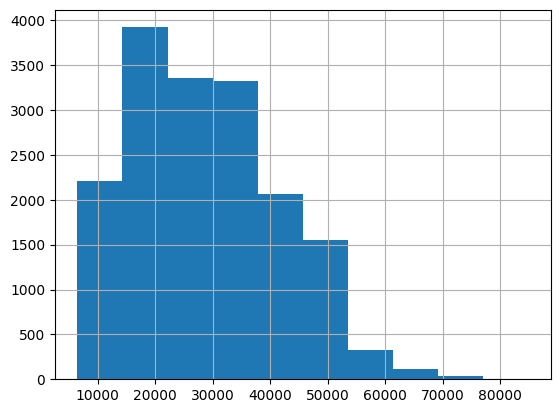

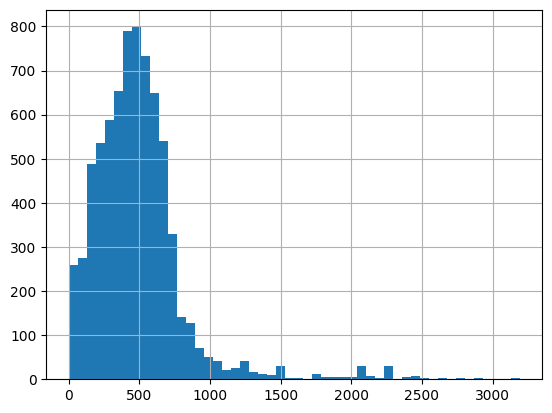

Соотношение количеcтва квартир возле парков к общему количеству квартир:  33.093912731190514 %


In [63]:
good_data.loc[good_data['airports_nearest'] > 0, 'airports_nearest'].hist()
plt.show()
good_data.loc[good_data['parks_nearest'] < 5000, 'parks_nearest'].hist(bins=50)
plt.show()
print ('Соотношение количеcтва квартир возле парков к общему количеству квартир: ',\
       (good_data.loc[good_data['parks_nearest'] < 5000, 'parks_nearest'].count()) / \
      (good_data['parks_nearest'].count()) * 100, '%')

Распределение по удаленности от аэропортов нормальное. Основная масса жилья находится примерно в 20 км от ближайшего аэропорта.
Соотношение количеcтва квартир возле парков к общему количеству квартир примерно 33 %

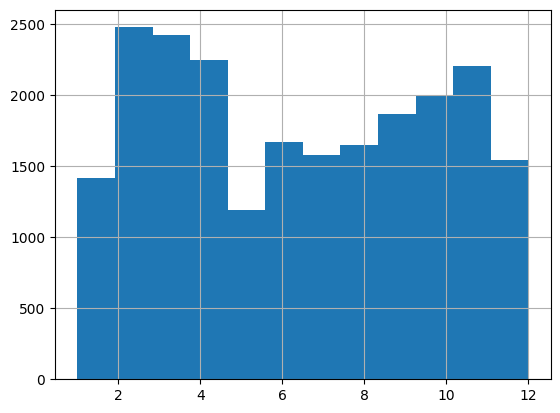

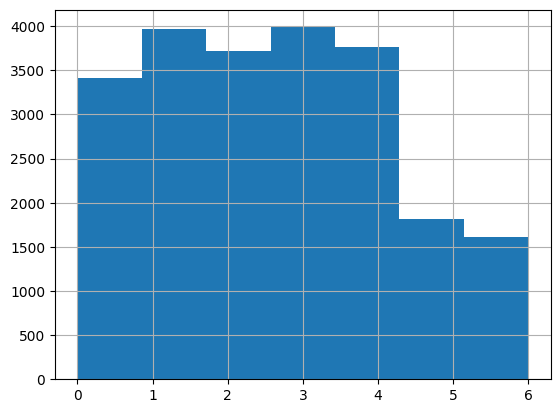

In [64]:
good_data['month'].hist(bins=12)
plt.show()
good_data['week_day'].hist(bins=7)
plt.show()

Январь, декабрь и май не пользуются популярностью у продавцов квартир из за обилия праздничных дней. Также небольшая просадка в летние месяцы, т.к многие уезжают в отпуск.

В будние дни различия в размещении объявлений небольшие, но вот в выходные ожидаемы провал почти вдвое. Люди отдыхают и откладывают дела.

### 4.2 Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

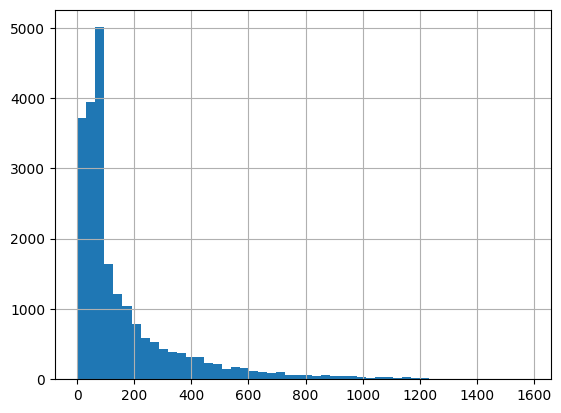

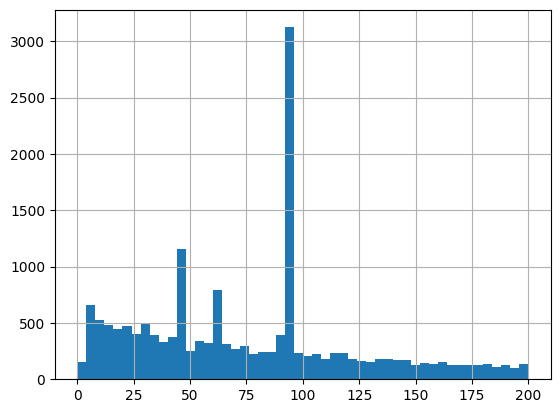

Среднее количество дней размещения объявления 167.0
Медианная количества дней размещения объявления 95.0


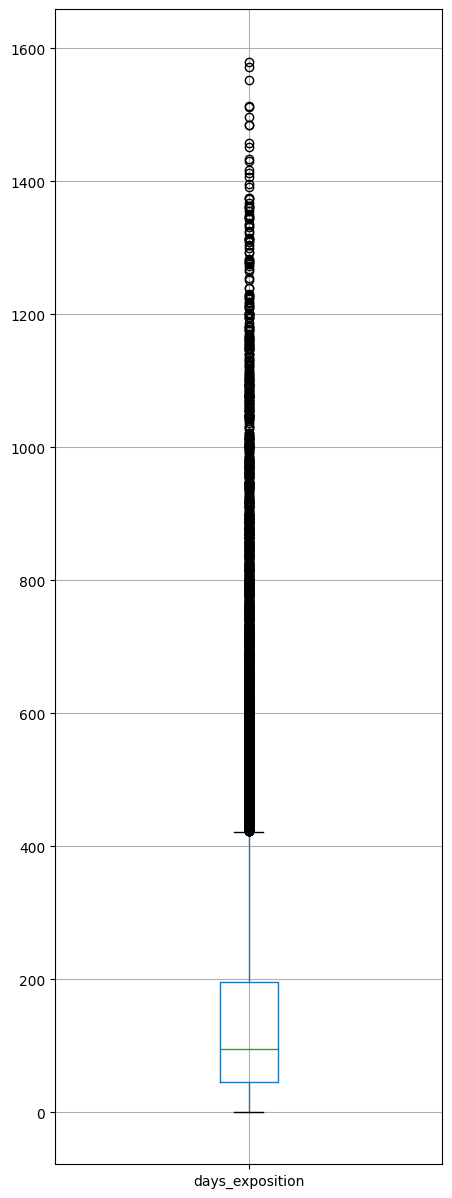

count    22276.000000
mean       166.785195
std        202.897413
min          1.000000
25%         45.000000
50%         95.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [65]:
good_data['days_exposition'].hist(bins=50)
plt.show()
good_data['days_exposition'].hist(bins=50, range=(0, 200))
plt.show()
print ('Среднее количество дней размещения объявления', good_data['days_exposition'].mean().round(0))
print ('Медианная количества дней размещения объявления', good_data['days_exposition'].median().round(0))
good_data.boxplot(column='days_exposition', figsize=(5, 15))
plt.show()
good_data['days_exposition'].describe()

Судя по медиане - основная часть объявлений находится в размещении в течении 95 дней.
На малом масштабе видны пики на 45, 60, 90 днях. Скорее всего - происходит автоматическое снятие объявлений при отсутсвии продления, поэтому такие аномальные выбросы.

Но есть и объявления, которые размещены по 4 с лишним года. А некоторые уходят за 1 день. посмотрим, что это за объявления.

In [66]:
very_fast_expo = good_data.query('days_exposition < 5')
very_slow_expo = good_data.query('days_exposition > 720')
print ('Количество объявлений всего:', good_data['cityCenters_nearest'].count())
print ('Количество объявлений быстрых:', very_fast_expo['cityCenters_nearest'].count())
print ('Количество объявлений медленных:', very_slow_expo['cityCenters_nearest'].count())
print()
print ('Средняя цена за кв.м. по всем объявлениям - ', good_data['square_price'].median(), 'р.')
print ('Средняя цена за кв.м. по быстрым объявлениям - ', very_fast_expo['square_price'].median(), 'р.')
print ('Средняя цена за кв.м. по медленным объявлениям - ', very_slow_expo['square_price'].median(), 'р.')
print()
print ('Среднее расстояние от центра по всем объявлениям - ', good_data['cityCenters_nearest'].median(), 'м')
print ('Среднее расстояние от центра по быстрым объявлениям - ', very_fast_expo['cityCenters_nearest'].median(), 'м')
print ('Среднее расстояние от центра по медленным объявлениям - ', very_slow_expo['cityCenters_nearest'].median(), 'м')
print()

print ('Среднее расстояние от аэропорта по всем объявлениям - ', good_data['airports_nearest'].median(), 'м')
print ('Среднее расстояние от аэропорта по быстрым объявлениям - ', very_fast_expo['airports_nearest'].median(), 'м')
print ('Среднее расстояние от аэропорта по медленным объявлениям - ', very_slow_expo['airports_nearest'].median(), 'м')


Количество объявлений всего: 22276
Количество объявлений быстрых: 320
Количество объявлений медленных: 700

Средняя цена за кв.м. по всем объявлениям -  94495.41 р.
Средняя цена за кв.м. по быстрым объявлениям -  96693.315 р.
Средняя цена за кв.м. по медленным объявлениям -  94686.275 р.

Среднее расстояние от центра по всем объявлениям -  11486.0 м
Среднее расстояние от центра по быстрым объявлениям -  11747.5 м
Среднее расстояние от центра по медленным объявлениям -  8460.0 м

Среднее расстояние от аэропорта по всем объявлениям -  21556.0 м
Среднее расстояние от аэропорта по быстрым объявлениям -  21771.0 м
Среднее расстояние от аэропорта по медленным объявлениям -  22219.0 м


In [67]:
for column in good_data:
    try:
        print ('Коээфициент коррелляции Пирсона для столбца', column, ' составляет', \
               good_data['days_exposition'].corr(good_data[column]).round(2))
    except:
        print ('Тип данных столбца', column, 'не подходит для расчета')
print ()
for column in very_fast_expo:
    try:
        print ('Коээфициент коррелляции Пирсона для столбца', column, ' составляет', \
               very_fast_expo['days_exposition'].corr(very_fast_expo[column]).round(2))
    except:
        print ('Тип данных столбца', column, 'не подходит для расчета')
print ()
for column in very_slow_expo:
    try:
        print ('Коээфициент коррелляции Пирсона для столбца', column, ' составляет', \
               very_slow_expo['days_exposition'].corr(very_slow_expo[column]).round(2))
    except:
        print ('Тип данных столбца', column, 'не подходит для расчета')

Коээфициент коррелляции Пирсона для столбца total_images  составляет -0.05
Коээфициент коррелляции Пирсона для столбца last_price  составляет 0.08
Коээфициент коррелляции Пирсона для столбца total_area  составляет 0.11
Тип данных столбца first_day_exposition не подходит для расчета
Коээфициент коррелляции Пирсона для столбца rooms  составляет 0.08
Коээфициент коррелляции Пирсона для столбца ceiling_height  составляет 0.06
Коээфициент коррелляции Пирсона для столбца floors_total  составляет -0.03
Коээфициент коррелляции Пирсона для столбца living_area  составляет 0.09
Коээфициент коррелляции Пирсона для столбца floor  составляет -0.03
Коээфициент коррелляции Пирсона для столбца is_apartment  составляет 0.01
Коээфициент коррелляции Пирсона для столбца studio  составляет -0.01
Коээфициент коррелляции Пирсона для столбца open_plan  составляет 0.0
Коээфициент коррелляции Пирсона для столбца kitchen_area  составляет 0.07
Коээфициент коррелляции Пирсона для столбца balcony  составляет -0.02
Т

Ни с одним из типов данных нет ярко выраженной зависимости.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22276 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22276 non-null  int64         
 1   last_price              22276 non-null  float64       
 2   total_area              22276 non-null  float64       
 3   first_day_exposition    22276 non-null  datetime64[ns]
 4   rooms                   22276 non-null  int64         
 5   ceiling_height          22276 non-null  float64       
 6   floors_total            22276 non-null  int64         
 7   living_area             22276 non-null  float64       
 8   floor                   22276 non-null  int64         
 9   is_apartment            22276 non-null  bool          
 10  studio                  22276 non-null  bool          
 11  open_plan               22276 non-null  bool          
 12  kitchen_area            22276 non-null  float6

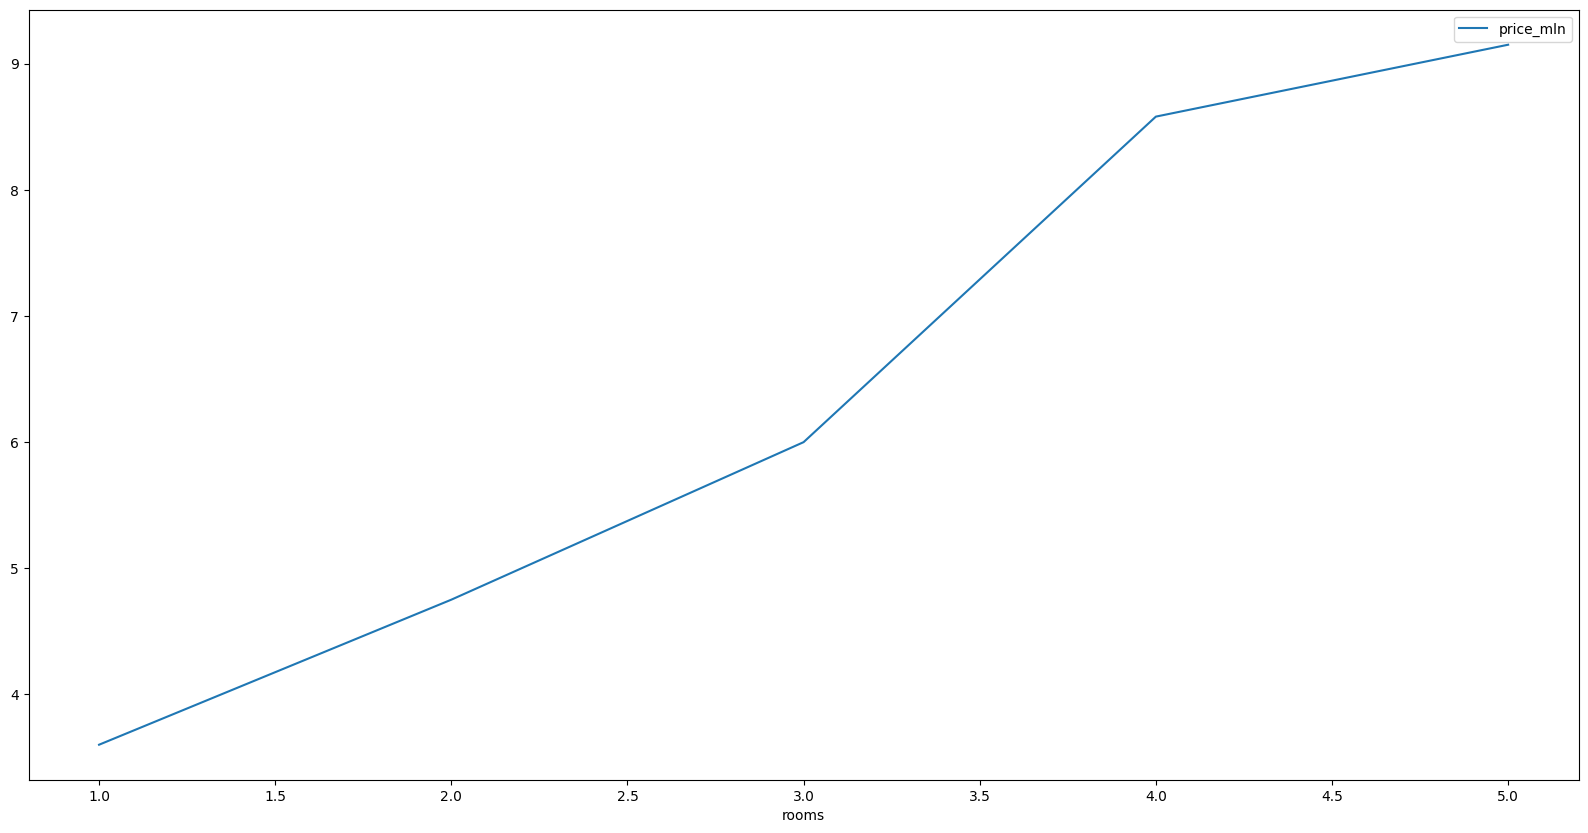

  floor_type  price_mln
0     другой       4.70
1     первый       3.85
2  последний       4.15


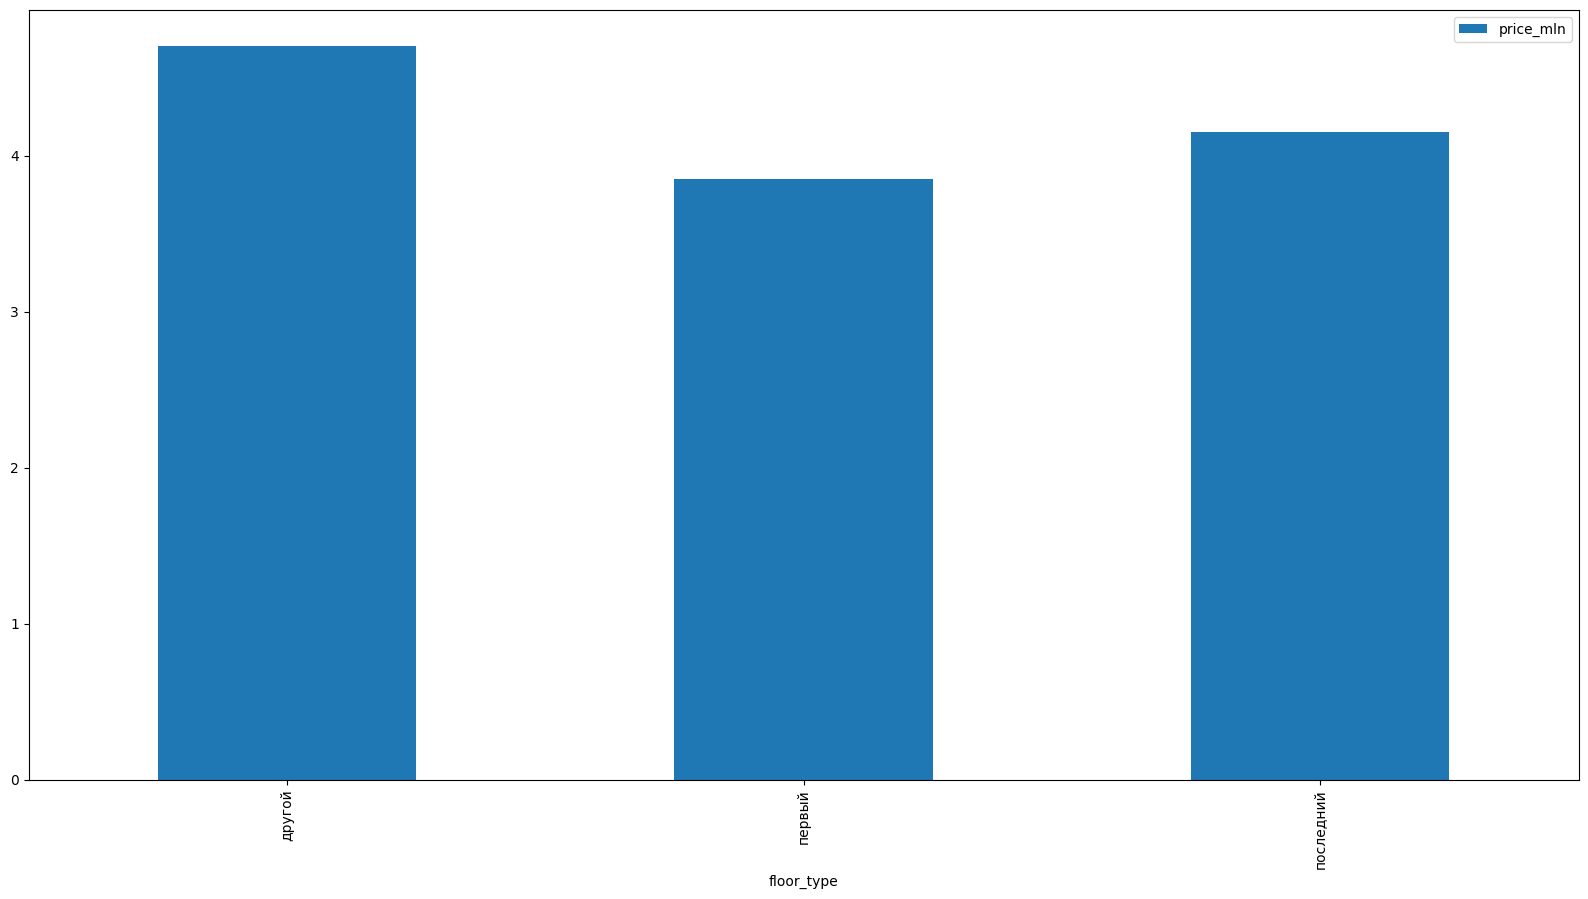

   week_day  price_mln
0         0       4.51
1         1       4.65
2         2       4.57
3         3       4.50
4         4       4.50
5         5       4.50
6         6       4.50


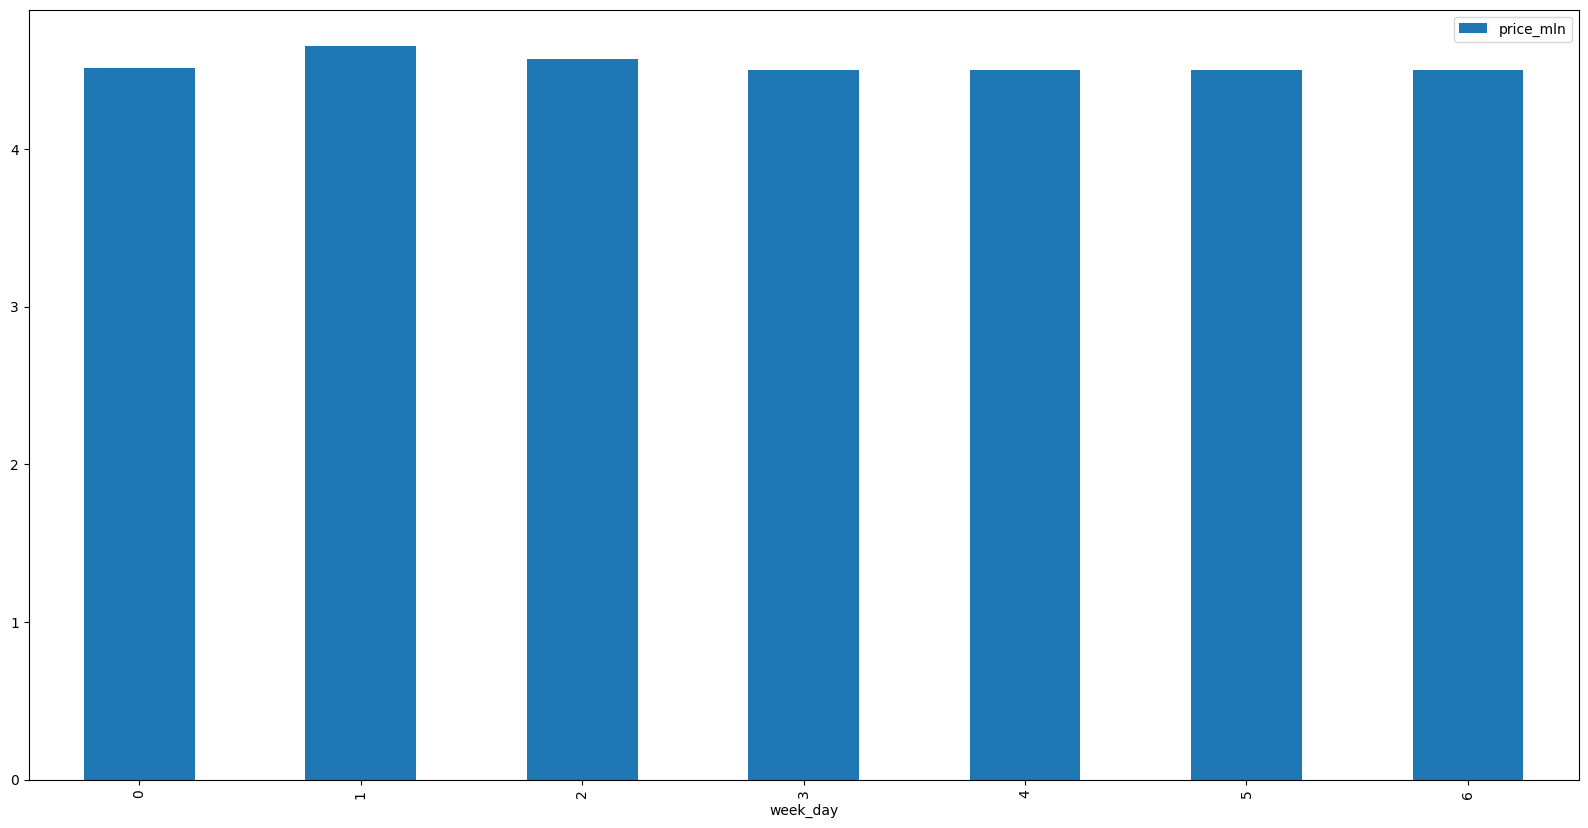

    month  price_mln
0       1     4.5000
1       2     4.5000
2       3     4.5325
3       4     4.7000
4       5     4.4500
5       6     4.2995
6       7     4.5000
7       8     4.5000
8       9     4.6000
9      10     4.5000
10     11     4.6000
11     12     4.6000


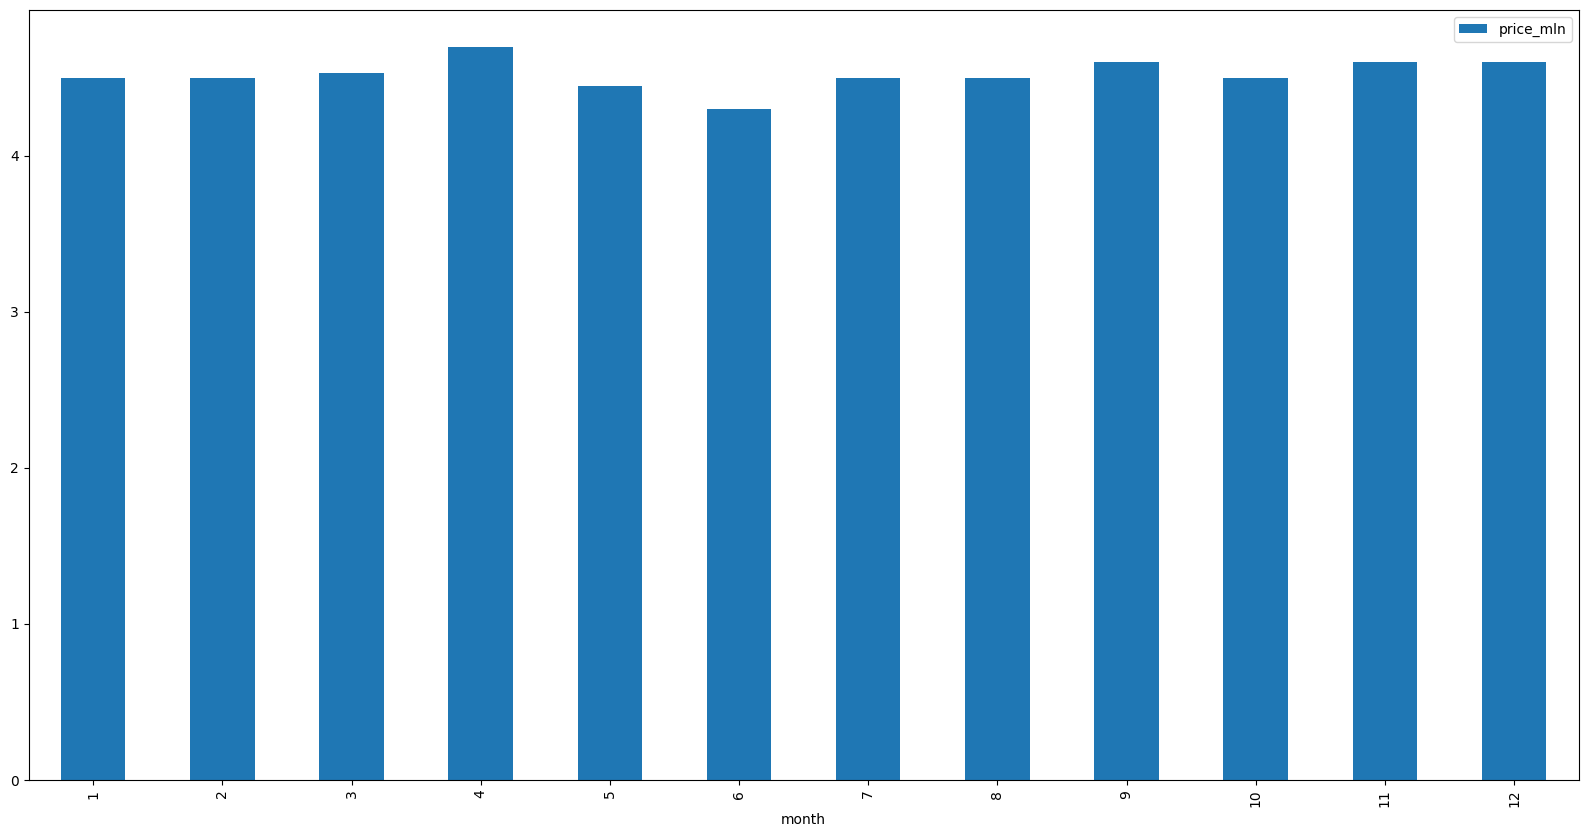

   year  price_mln
0  2014     6.2000
1  2015     5.0045
2  2016     4.4000
3  2017     4.4000
4  2018     4.5000
5  2019     4.9500


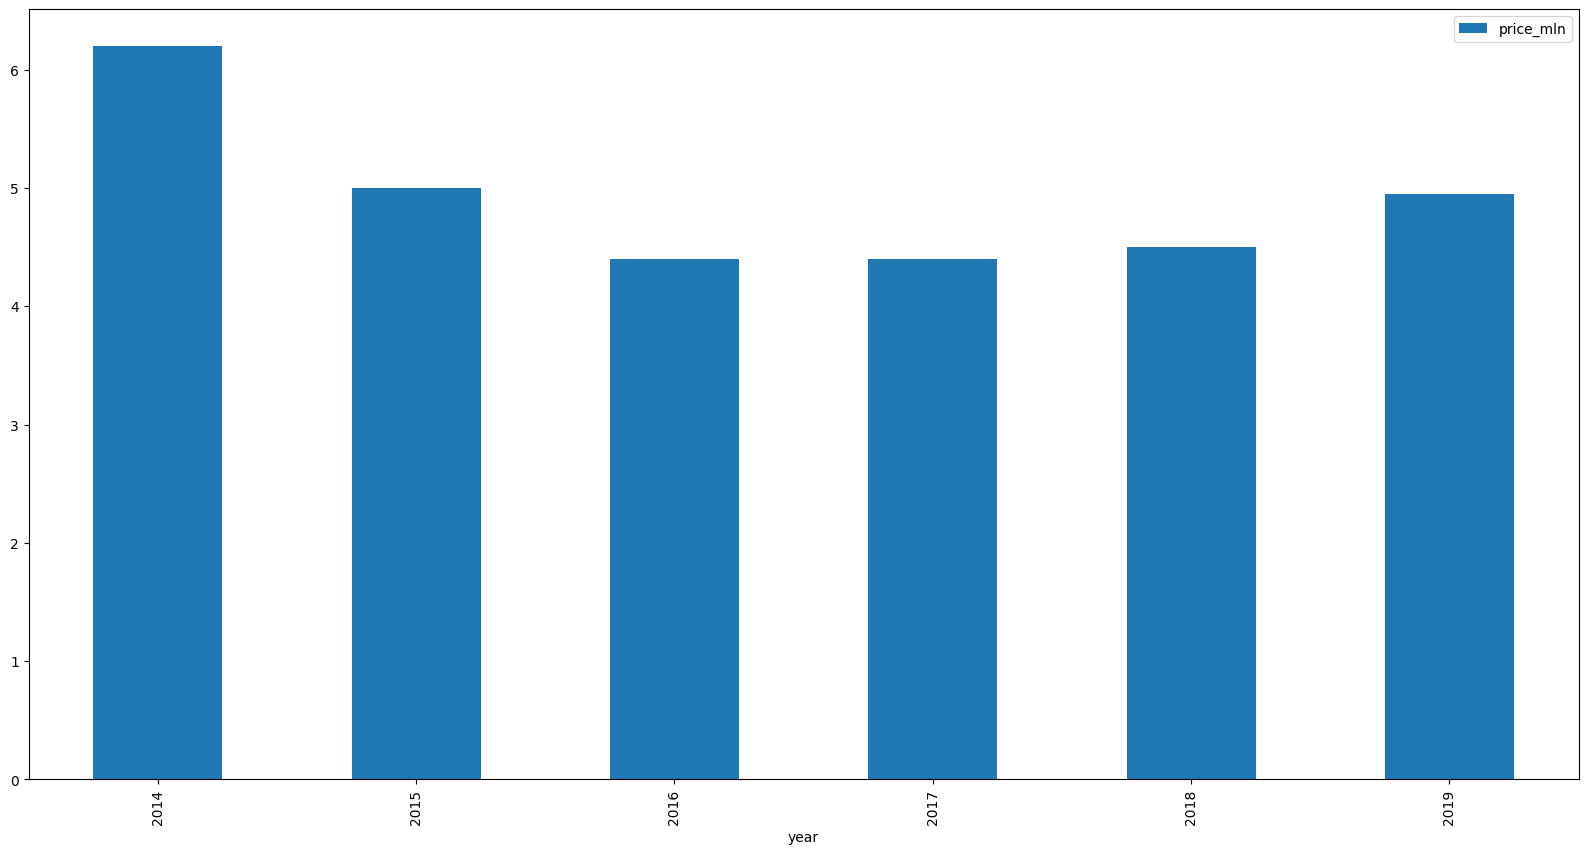

In [68]:
print(good_data.info())
med_price = good_data.query('last_price < 20000000').pivot_table(index='rooms', values='price_mln', aggfunc='median')\
                                                    .reset_index(drop= False)
print (med_price)
med_price.plot(x='rooms', y='price_mln', kind='line', figsize=(20, 10))
plt.show()

med_floor = good_data.query('last_price < 20000000').pivot_table(index='floor_type', values='price_mln', aggfunc='median')\
                                                    .reset_index(drop= False)
print (med_floor)
med_floor.plot(x='floor_type', y='price_mln', kind='bar', figsize=(20, 10))
plt.show()

med_week_day = good_data.query('last_price < 20000000').pivot_table(index='week_day', values='price_mln', aggfunc='median')\
                                                        .reset_index(drop= False)
print (med_week_day)
med_week_day.plot(x='week_day', y='price_mln', kind='bar', figsize=(20, 10))
plt.show()

med_month = good_data.query('last_price < 20000000').pivot_table(index='month', values='price_mln', aggfunc='median')\
                                                        .reset_index(drop= False)
print (med_month)
med_month.plot(x='month', y='price_mln', kind='bar', figsize=(20, 10))
plt.show()

med_year = good_data.query('last_price < 20000000').pivot_table(index='year', values='price_mln', aggfunc='median')\
                                                        .reset_index(drop= False)
print (med_year)
med_year.plot(x='year', y='price_mln', kind='bar', figsize=(20, 10))
plt.show()

<div class="alert alert-info">
Как видно из графиков:
* медианная цена зависит от количества комнат, причем зависимость возрастает квартир с количеством комнат более 3.
    
* Медианная цена за квартиры на первых и последних этажах ожидаемо ниже медианных цен на остальных этажах.

* Цены не зависят от размещения по дням недели или по месяцам. Колебания очень низки.
    
* В 2014 году были самые высокие цены на недвижимость, после чего снижались вплоть до 2017 года, после чего начался небольшой рост, но на уровень 2014 так и не вышли.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [69]:
# Исключим те строки, в которых неизвестен населенный пункт
sort_table = good_data.loc[good_data['locality_name'] != 'Unknown'].\
            pivot_table(index='locality_name', values='square_price', aggfunc=['count', 'mean']).\
            reset_index(level='locality_name')
sort_table.columns = ['локация', 'количество', 'средняя цена за кв.м.']
sort_table = sort_table.sort_values('количество', ascending=False).head(10).reset_index(drop= True)
print (sort_table)
print()
print()
print ('Населенный пункт с самой высокой средней ценой за кв.метр - \n\n', \
       sort_table [sort_table['средняя цена за кв.м.'] == sort_table['средняя цена за кв.м.'].max()])
print()
print()
print ('Населенный пункт с самой низкой средней ценой за кв.метр - \n\n', \
       sort_table [sort_table['средняя цена за кв.м.'] == sort_table['средняя цена за кв.м.'].min()])

           локация  количество  средняя цена за кв.м.
0  Санкт-Петербург       14541          111754.815468
1           Мурино         557           85537.344470
2          Кудрово         449           95083.103786
3           Шушары         433           78313.990647
4       Всеволожск         387           68745.756150
5           Пушкин         352          103004.641420
6          Колпино         329           75614.149696
7        Парголово         322           90448.423416
8          Гатчина         301           68885.969701
9           Выборг         230           58268.800435


Населенный пункт с самой высокой средней ценой за кв.метр - 

            локация  количество  средняя цена за кв.м.
0  Санкт-Петербург       14541          111754.815468


Населенный пункт с самой низкой средней ценой за кв.метр - 

   локация  количество  средняя цена за кв.м.
9  Выборг         230           58268.800435


### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<Axes: xlabel='Расстояние_от_центра', ylabel='Средняя_цена,_млн.р'>

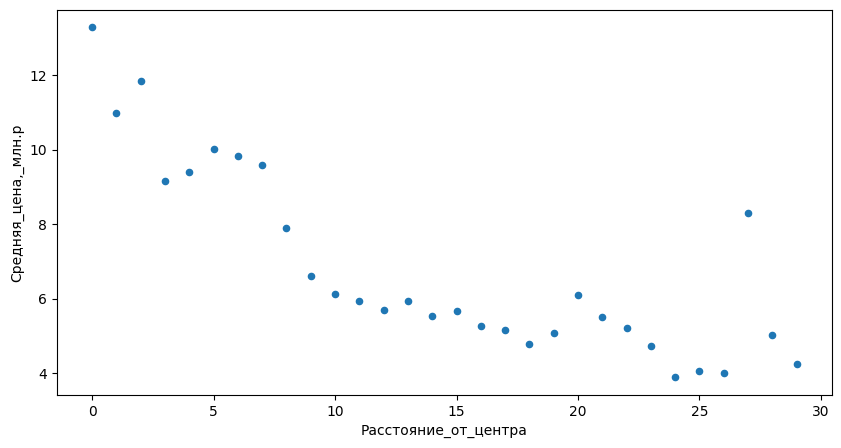

In [70]:
#good_data.info()
SPB_flat = good_data.loc[good_data['locality_name'] == 'Санкт-Петербург']
SPB_flat_grouped = SPB_flat.pivot_table(index='cityCenters_nearest_km', values = 'price_mln', aggfunc=('mean')).\
reset_index(level='cityCenters_nearest_km')
SPB_flat_grouped.columns = ['Расстояние_от_центра', 'Средняя_цена,_млн.р']
SPB_flat_grouped.plot(x='Расстояние_от_центра', y='Средняя_цена,_млн.р', kind='scatter', figsize=(10, 5))

На графике видно, что существует обратная зависимость цены от расстояния до центра Санкт-Петербурга. Чем дальше от центра, тм цена дешевле

### Общий вывод

Проведя исследование предоставленных данных можно сделать следующие выводы:
* 1,2,3 комнатные квартиры в основном типовые по площади. В случае, если комнат больше, то общая площадь может остаться такой же. Это может объяснятся тем, что жильцы разделяли свои комнаты на 2 и больше.
* Некоторые кухни обладают большой площадью. это может объясняттся тем, что объединили кухню с жилой комнатой на манер студии.
* Средняя цена за квартиру - 4,5-5,5 млн.руб
* Наибольшей текучкой на рынке являются 1 и 2 комнатные квартиры. Наиболее редкими являются квартиры от 4 комнат и больше.
* Высота потолков ожидаемо в большей части случаев равна от 2,5 до 3 метров. Очень высокие потолки встречаются очень редко и в основном находятся в СПБ. Лишь 7 находятся за пределами СПБ. Вероятнее всего - дома старой постройки.
* В продаже чаще всего жилье в 5, 9, 12, 15-этажных домах, что объясняется типовой застройкой
* дешевле всего квартиры на 1 и последнем этажах.
* До 20 км идут квартиры в пределах Санкт-Петербурга, потом начинаются пригороды и количество квартир резко падает. Небольшой всплеск наблюдается в отдалении 50 км, где находятся Ломоносов, Кронштадт, Петергоф, Зеленогорск.
* Распределение по удаленности от аэропортов нормальное. Основная масса жилья находится примерно в  20 км от ближайшего аэропорта.
* Соотношение количеcтва квартир возле парков к общему количеству квартир примерно 33 %
* Январь, декабрь и май не пользуются популярностью у продавцов квартир из за обилия праздничных дней. Также небольшая просадка в летние месяцы, т.к многие уезжают в отпуск.
* В будние дни различия в размещении объявлений небольшие, но вот в выходные ожидаемы провал почти вдвое. Люди отдыхают и откладывают дела.
* основная часть объявлений находится в размещении в течении 95 дней.
* Не удалось выявить какой либо зависимости длительности размещения объявлений. Видимо, покупателям не нравится что –то на конкретных местах.
* существует прямая зависимость цены от общей площади, жилой, площади, площади кухни и количества комнат. Хоть она и не ярко выражена, но существует. Чем больше значения этих параметров, тем выше цена квартиры.
* медианная цена зависит от количества комнат, причем зависимость возрастает квартир с количеством комнат более 3.
* Медианная цена за квартиры на первых и последних этажах ожидаемо ниже медианных цен на остальных этажах.
* Цены не зависят от размещения по дням недели или по месяцам. Колебания очень низки.
* В 2014 году были самые высокие цены на недвижимость, после чего снижались вплоть до 2017 года, после чего начался небольшой рост, но на уровень 2014 так и не вышли.
* Существует обратная зависимость цены от расстояния до центра Санкт-Петербурга. Чем дальше от центра, тм цена дешевле
